# DATOS DEL JUGADOR 5 PARA EL ACELEROMETRO

In [1]:
#librerias
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import numpy as np
from scipy.signal import detrend
from fastdtw import dtw
import csv
from scipy.ndimage import gaussian_filter
import win32api
from scipy.signal import savgol_filter
from scipy.signal import medfilt
import pywt
from scipy.signal import detrend


In [2]:
# #El proceso puede requerir mas memoria de la que se dispone por lo que se amplia

# # Obtener el límite de uso de memoria virtual actual (en bytes)
# current_limit = win32api.GetProcessMemoryInfo(win32api.GetCurrentProcess())['PagefileUsage']
# print("Límite de uso de memoria virtual actual (en bytes):", current_limit)

# # Establecer un nuevo límite de uso de memoria virtual (en bytes)
# # Por ejemplo, establecer el límite en 20 GB (20 * 1024 * 1024 * 1024 bytes)
# new_limit = 20 * 1024 * 1024 * 1024
# win32api.SetProcessWorkingSetSize(win32api.GetCurrentProcess(), -1, new_limit)

# # Verificar que el límite de uso de memoria virtual se haya actualizado
# current_limit = win32api.GetProcessMemoryInfo(win32api.GetCurrentProcess())['PagefileUsage']
# print("Nuevo límite de uso de memoria virtual (en bytes):", current_limit)


In [3]:
#lectura como dataframe de todos los golpes del jugador 1 del acelerometro
df_dreta = pd.read_csv('C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 5/Enregistraments J5/J5 Dreta ACC.csv')
df_reves = pd.read_csv('C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 5/Enregistraments J5/J5 Reves ACC.csv')
df_serve = pd.read_csv('C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 5/Enregistraments J5/J5 Serve ACC.csv')
df_smash = pd.read_csv('C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 5/Enregistraments J5/J5 Smash ACC.csv')
df_vd = pd.read_csv('C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 5/Enregistraments J5/J5 VD ACC.csv')
df_vr = pd.read_csv('C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 5/Enregistraments J5/J5 VR ACC.csv')


In [4]:
#visualizamos las primeras lineas del dataframe
df_reves.head()

ACC_X     ACC_Y     ACC_Z                         DATE  UNIX_TIMESTAMP
0  0.050102  0.100150  0.087017  2023-10-21T15:31:31.745192Z   1697902291745
1  0.063079  0.124390  0.109394  2023-10-21T15:31:31.764544Z   1697902291764
2  0.095640  0.185123  0.164379  2023-10-21T15:31:31.784797Z   1697902291784
3  0.073245  0.145617  0.128507  2023-10-21T15:31:31.808847Z   1697902291808
4  0.055692  0.110118  0.097107  2023-10-21T15:31:31.828513Z   1697902291828

In [5]:
df_dreta.head()

ACC_X     ACC_Y     ACC_Z                         DATE  UNIX_TIMESTAMP
0  0.095275  0.502092  0.129672  2023-10-21T15:26:54.813278Z   1697902014813
1  0.111215  0.573022  0.144634  2023-10-21T15:26:54.833637Z   1697902014833
2  0.088009  0.425291  0.104025  2023-10-21T15:26:54.853845Z   1697902014853
3  0.061938  0.295197  0.072036  2023-10-21T15:26:54.878803Z   1697902014878
4  0.045640  0.205199  0.050266  2023-10-21T15:26:54.895909Z   1697902014895

In [6]:
df_serve.head()

ACC_X     ACC_Y     ACC_Z                         DATE  UNIX_TIMESTAMP
0  0.078817  0.247687  0.050714  2023-10-21T15:38:42.871088Z   1697902722871
1  0.069445  0.225437  0.046614  2023-10-21T15:38:42.891256Z   1697902722891
2  0.034755  0.115727  0.022941  2023-10-21T15:38:42.911502Z   1697902722911
3  0.010535  0.033351  0.006059  2023-10-21T15:38:42.931719Z   1697902722931
4  0.035454  0.101586  0.016979  2023-10-21T15:38:42.951965Z   1697902722951

In [7]:
df_smash.head()

ACC_X     ACC_Y     ACC_Z                         DATE  UNIX_TIMESTAMP
0  0.055478  0.247241  0.041890  2023-10-21T15:37:11.632163Z   1697902631632
1  0.047033  0.208775  0.035097  2023-10-21T15:37:11.652698Z   1697902631652
2  0.061894  0.279930  0.043847  2023-10-21T15:37:11.672796Z   1697902631672
3  0.064896  0.296725  0.046969  2023-10-21T15:37:11.693119Z   1697902631693
4  0.079208  0.345016  0.051701  2023-10-21T15:37:11.713325Z   1697902631713

In [8]:
df_vd.head()

ACC_X     ACC_Y     ACC_Z                         DATE  UNIX_TIMESTAMP
0  0.034099  0.193349  0.044578  2023-10-21T15:33:45.213922Z   1697902425213
1  0.008797  0.064884  0.015080  2023-10-21T15:33:45.233188Z   1697902425233
2 -0.012209 -0.158826 -0.038647  2023-10-21T15:33:45.253433Z   1697902425253
3  0.006696 -0.281602 -0.065596  2023-10-21T15:33:45.273675Z   1697902425273
4 -0.000384 -0.372710 -0.081159  2023-10-21T15:33:45.293911Z   1697902425293

In [9]:
df_vr.head()

ACC_X     ACC_Y     ACC_Z                         DATE  UNIX_TIMESTAMP
0  0.087203  0.321620 -0.008376  2023-10-21T15:34:54.363943Z   1697902494363
1  0.074609  0.271593 -0.005512  2023-10-21T15:34:54.383253Z   1697902494383
2  0.025870  0.100047 -0.002258  2023-10-21T15:34:54.403572Z   1697902494403
3  0.026096  0.100919 -0.002681  2023-10-21T15:34:54.423813Z   1697902494423
4  0.045713  0.176830 -0.004309  2023-10-21T15:34:54.444111Z   1697902494444

In [10]:
#eliminamos la columna Date de todos los df ya que solo usaremos el Unixtimestamp
df_dreta = df_dreta.drop(columns=['DATE'])
df_reves = df_reves.drop(columns=['DATE'])
df_serve = df_serve.drop(columns=['DATE'])
df_smash = df_smash.drop(columns=['DATE'])
df_vd = df_vd.drop(columns=['DATE'])
df_vr = df_vr.drop(columns=['DATE'])

In [11]:
#vemos efectivamente que la columna se ha eliminado
df_dreta.head()

ACC_X     ACC_Y     ACC_Z  UNIX_TIMESTAMP
0  0.095275  0.502092  0.129672   1697902014813
1  0.111215  0.573022  0.144634   1697902014833
2  0.088009  0.425291  0.104025   1697902014853
3  0.061938  0.295197  0.072036   1697902014878
4  0.045640  0.205199  0.050266   1697902014895

In [12]:
#busqueda NAs y Nulos

In [13]:
# Convertir el diccionario a un DataFrame
df = pd.DataFrame(df_dreta)

# Buscar NaNs
nan_count = df.isna().sum()

# Buscar ceros
zero_count = (df == 0).sum()

# Mostrar resultados
print("Conteo de valores NaN por columna:")
print(nan_count)
print("\nConteo de ceros por columna:")
print(zero_count)

Conteo de valores NaN por columna:
ACC_X             0
ACC_Y             0
ACC_Z             0
UNIX_TIMESTAMP    0
dtype: int64

Conteo de ceros por columna:
ACC_X             0
ACC_Y             0
ACC_Z             0
UNIX_TIMESTAMP    0
dtype: int64


In [14]:
#Outliers

In [15]:

# Convertir el diccionario a un DataFrame
df = pd.DataFrame(df_dreta)

# Función para detectar outliers usando el método IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Detectar outliers en cada columna
outliers_acc_z = detect_outliers_iqr(df['ACC_Z'])

# Mostrar resultados
print("Outliers en ACC_Z:")
print(outliers_acc_z)
print(len(outliers_acc_z))


Outliers en ACC_Z:
1336   -1.142734
1337   -1.565241
1338   -2.043990
1339   -2.561392
1340   -3.089947
          ...   
6871   -2.575746
6872   -2.130220
6873   -1.720586
6874   -1.354367
6875   -1.026792
Name: ACC_Z, Length: 1563, dtype: float64
1563


In [16]:
# Detectar outliers en cada columna
outliers_acc_y = detect_outliers_iqr(df['ACC_Y'])

# Mostrar resultados
print("Outliers en ACC_Y:")
print(outliers_acc_y)
print(len(outliers_acc_y))


Outliers en ACC_Y:
208    -0.682078
209    -0.703389
210    -0.693626
280    -0.681334
281    -0.717003
          ...   
6868    2.071321
6869    1.946237
6870    1.790085
6871    1.616707
6872    1.431759
Name: ACC_Y, Length: 1003, dtype: float64
1003


In [17]:
# Detectar outliers en cada columna
outliers_acc_x = detect_outliers_iqr(df['ACC_X'])

# Mostrar resultados
print("Outliers en ACC_X:")
print(outliers_acc_x)
print(len(outliers_acc_x))


Outliers en ACC_X:
1338    2.111662
1339    2.495137
1340    2.852395
1341    3.183894
1342    3.517478
          ...   
6870    5.866515
6871    5.167601
6872    4.367075
6873    3.514393
6874    2.682747
Name: ACC_X, Length: 1463, dtype: float64
1463


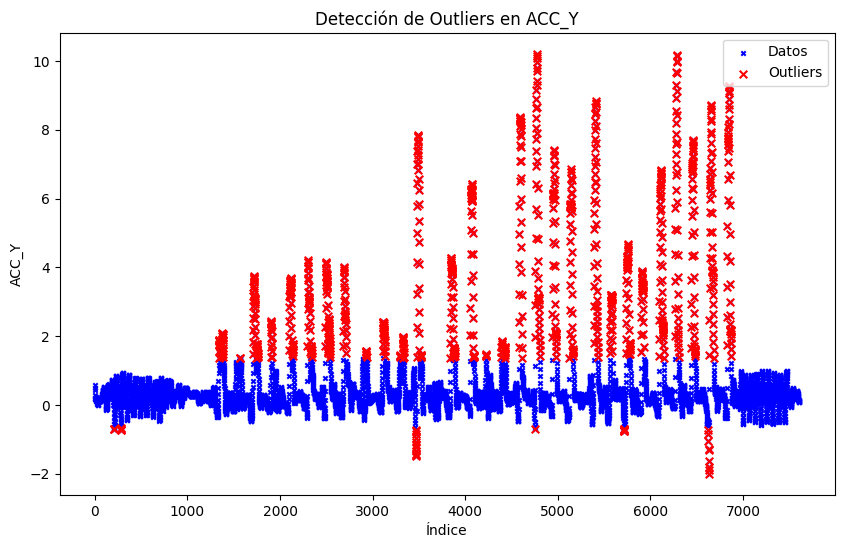

In [18]:

# Graficar los puntos y resaltar los outliers con cruces pequeñas
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['ACC_Y'], label='Datos', color='blue', s=10, marker='x')
plt.scatter(outliers_acc_y.index, outliers_acc_y, label='Outliers', color='red', s=30, marker='x')
plt.xlabel('Índice')
plt.ylabel('ACC_Y')
plt.title('Detección de Outliers en ACC_Y')
plt.legend()
plt.show()

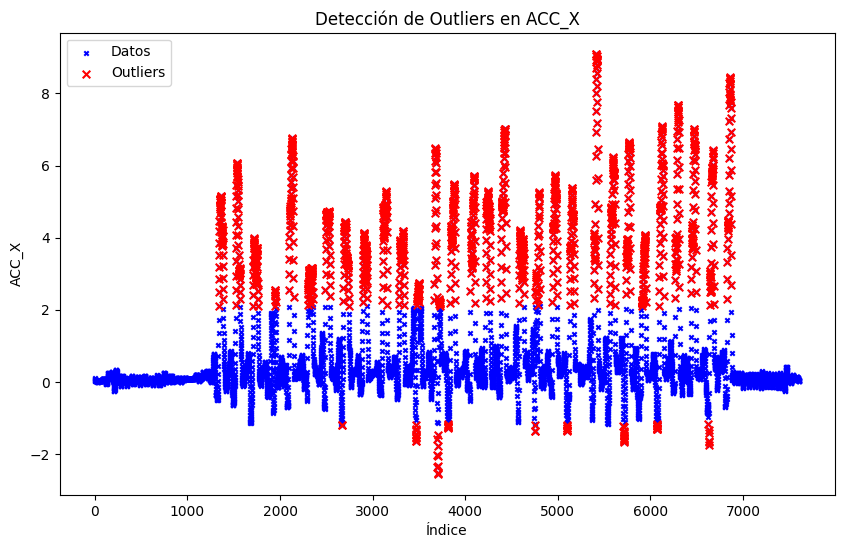

In [19]:

# Graficar los puntos y resaltar los outliers con cruces pequeñas
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['ACC_X'], label='Datos', color='blue', s=10, marker='x')
plt.scatter(outliers_acc_x.index, outliers_acc_x, label='Outliers', color='red', s=30, marker='x')
plt.xlabel('Índice')
plt.ylabel('ACC_X')
plt.title('Detección de Outliers en ACC_X')
plt.legend()
plt.show()

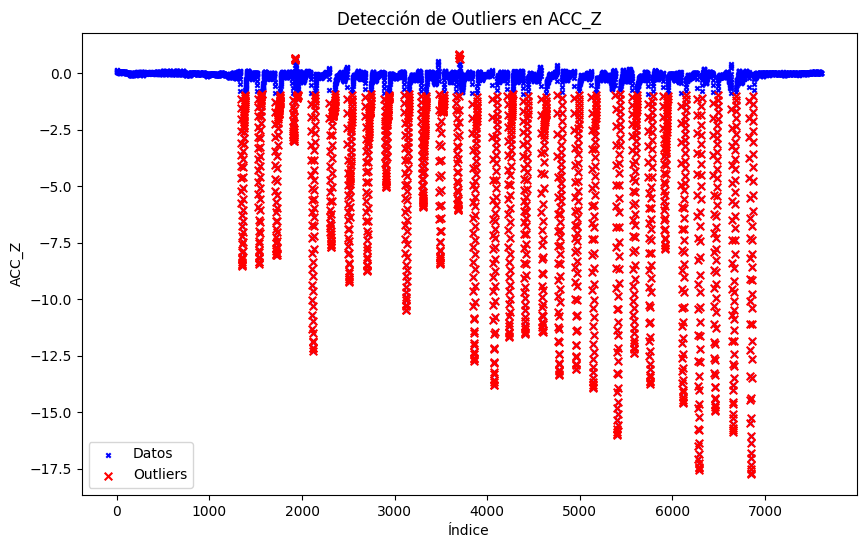

In [20]:

# Graficar los puntos y resaltar los outliers con cruces pequeñas
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['ACC_Z'], label='Datos', color='blue', s=10, marker='x')
plt.scatter(outliers_acc_z.index, outliers_acc_z, label='Outliers', color='red', s=30, marker='x')
plt.xlabel('Índice')
plt.ylabel('ACC_Z')
plt.title('Detección de Outliers en ACC_Z')
plt.legend()
plt.show()

In [21]:

# Definir el tipo de dato para cada columna
dtype = [('ACC_X', float), ('ACC_Y', float), ('ACC_Z', float), ('UNIX_TIMESTAMP', int)]

# Convertir el DataFrame a un array NumPy con tipos de datos específicos
array_dreta = np.array(df_dreta.to_records(index=False), dtype=dtype)

array_reves = np.array(df_reves.to_records(index=False), dtype=dtype)

array_serve = np.array(df_serve.to_records(index=False), dtype=dtype)

array_smash = np.array(df_smash.to_records(index=False), dtype=dtype)

array_vd = np.array(df_vd.to_records(index=False), dtype=dtype)

array_vr = np.array(df_vr.to_records(index=False), dtype=dtype)



In [22]:
array_vr['UNIX_TIMESTAMP']

array([1390412443, 1390412463, 1390412483, ..., 1390493113, 1390493133,
       1390493158])

In [23]:
#GRAFICAMOS TODOS LOS EJES PARA TENER UNA PRIMERA VISUALIZACION

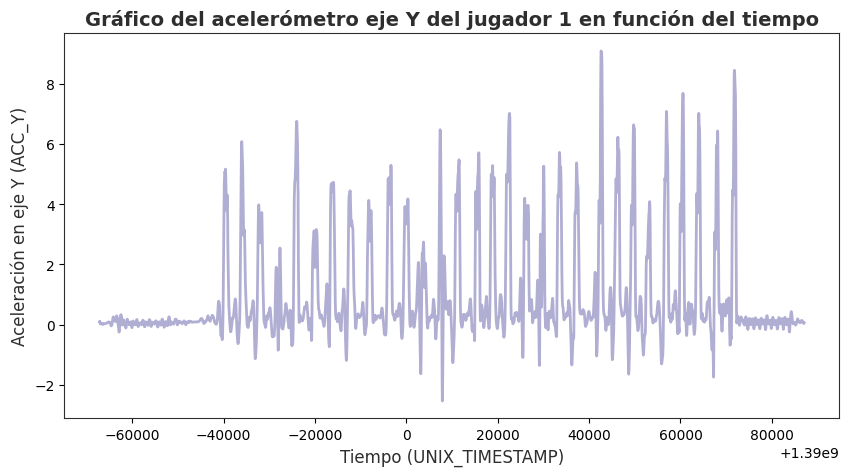

In [24]:

# Extraer los datos
acc_x = array_dreta['ACC_X']
unix_timestamp = array_dreta['UNIX_TIMESTAMP']

# Crear el gráfico
plt.figure(figsize=(10, 5))

# Personalizar el gráfico con una línea de tendencia
plt.plot(unix_timestamp, acc_x, linestyle='-', linewidth=2, color='#9e9ac8', alpha=0.8)

# Agregar título y etiquetas
plt.title('Gráfico del acelerómetro eje Y del jugador 1 en función del tiempo', fontsize=14, fontweight='bold', color='#2e2e2e')
plt.xlabel('Tiempo (UNIX_TIMESTAMP)', fontsize=12, color='#2e2e2e')
plt.ylabel('Aceleración en eje Y (ACC_Y)', fontsize=12, color='#2e2e2e')

# Cambiar el color de los ejes
plt.gca().spines['bottom'].set_color('#2e2e2e')
plt.gca().spines['top'].set_color('#2e2e2e')
plt.gca().spines['left'].set_color('#2e2e2e')
plt.gca().spines['right'].set_color('#2e2e2e')

# Ocultar la cuadrícula de fondo
plt.grid(False)

# Mostrar el gráfico
plt.show()

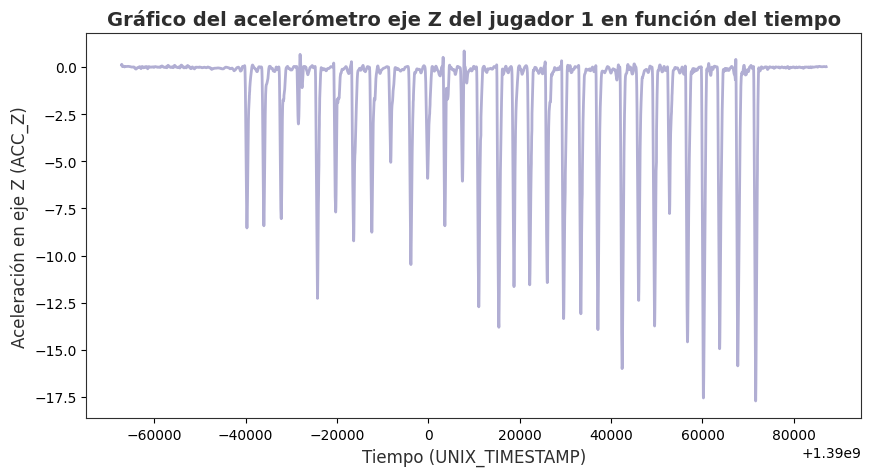

In [25]:
# Extraer los datos
acc_z = array_dreta['ACC_Z']
unix_timestamp = array_dreta['UNIX_TIMESTAMP']

# Crear el gráfico
plt.figure(figsize=(10, 5))

# Personalizar el gráfico con una línea de tendencia
plt.plot(unix_timestamp, acc_z, linestyle='-', linewidth=2, color='#9e9ac8', alpha=0.8)

# Agregar título y etiquetas
plt.title('Gráfico del acelerómetro eje Z del jugador 1 en función del tiempo', fontsize=14, fontweight='bold', color='#2e2e2e')
plt.xlabel('Tiempo (UNIX_TIMESTAMP)', fontsize=12, color='#2e2e2e')
plt.ylabel('Aceleración en eje Z (ACC_Z)', fontsize=12, color='#2e2e2e')

# Cambiar el color de los ejes
plt.gca().spines['bottom'].set_color('#2e2e2e')
plt.gca().spines['top'].set_color('#2e2e2e')
plt.gca().spines['left'].set_color('#2e2e2e')
plt.gca().spines['right'].set_color('#2e2e2e')

# Ocultar la cuadrícula de fondo
plt.grid(False)

# Mostrar el gráfico
plt.show()

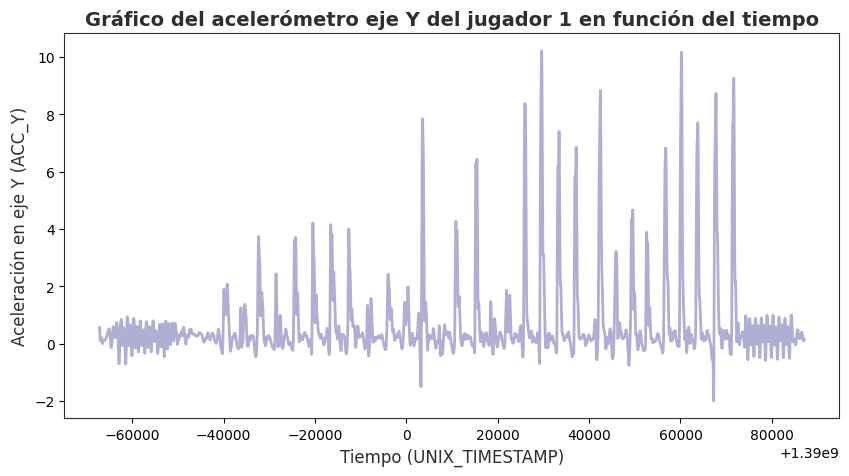

In [26]:
# Extraer los datos
acc_y = array_dreta['ACC_Y']
unix_timestamp = array_dreta['UNIX_TIMESTAMP']

# Crear el gráfico
plt.figure(figsize=(10, 5))

# Personalizar el gráfico con una línea de tendencia
plt.plot(unix_timestamp, acc_y, linestyle='-', linewidth=2, color='#9e9ac8', alpha=0.8)

# Agregar título y etiquetas
plt.title('Gráfico del acelerómetro eje Y del jugador 1 en función del tiempo', fontsize=14, fontweight='bold', color='#2e2e2e')
plt.xlabel('Tiempo (UNIX_TIMESTAMP)', fontsize=12, color='#2e2e2e')
plt.ylabel('Aceleración en eje Y (ACC_Y)', fontsize=12, color='#2e2e2e')

# Cambiar el color de los ejes
plt.gca().spines['bottom'].set_color('#2e2e2e')
plt.gca().spines['top'].set_color('#2e2e2e')
plt.gca().spines['left'].set_color('#2e2e2e')
plt.gca().spines['right'].set_color('#2e2e2e')

# Ocultar la cuadrícula de fondo
plt.grid(False)

# Mostrar el gráfico
plt.show()

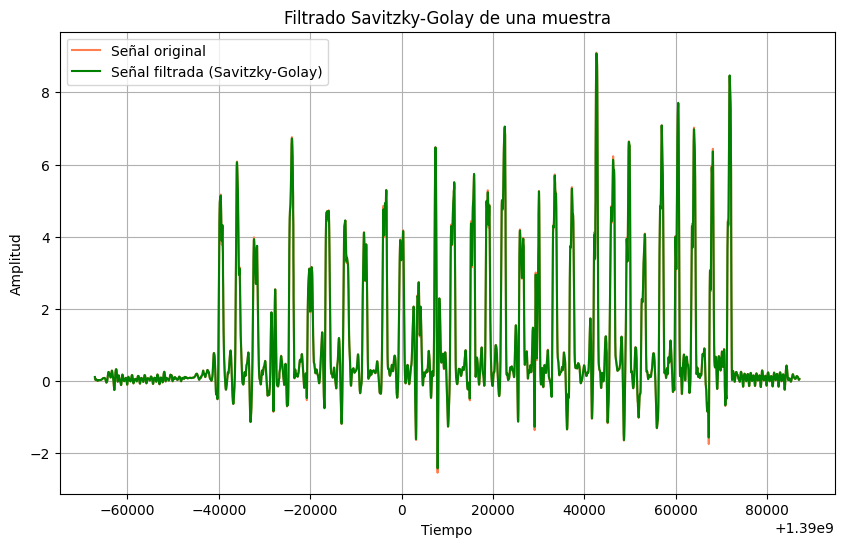

In [27]:


# Aplicar el filtrado Savitzky-Golay a la segunda columna de la muestra
filtered_signal_savgol = savgol_filter(acc_x, window_length=13, polyorder=2)

# Graficar la señal original y la señal filtrada con Savitzky-Golay
plt.figure(figsize=(10, 6))
plt.plot(unix_timestamp, acc_x, label='Señal original',  color='coral')
plt.plot(unix_timestamp, filtered_signal_savgol, label='Señal filtrada (Savitzky-Golay)',  color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtrado Savitzky-Golay de una muestra')
plt.legend()
plt.grid(True)
plt.show()


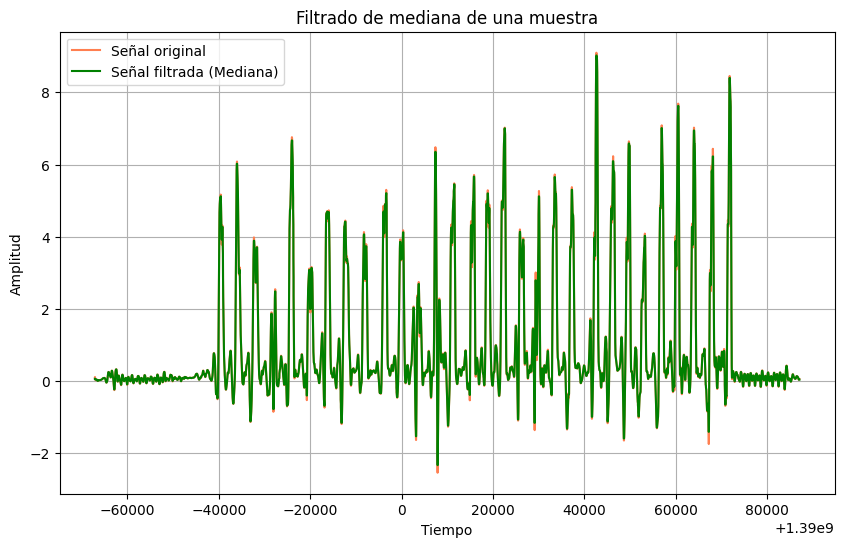

In [28]:

# Aplicar el filtrado de mediana a la segunda columna de la muestra
filtered_signal_medfilt = medfilt(acc_x, kernel_size=7)  # El tamaño del kernel debe ser impar

# Graficar la señal original y la señal filtrada con mediana
plt.figure(figsize=(10, 6))
plt.plot(unix_timestamp, acc_x, label='Señal original',  color='coral')
plt.plot(unix_timestamp, filtered_signal_medfilt, label='Señal filtrada (Mediana)',  color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtrado de mediana de una muestra')
plt.legend()
plt.grid(True)
plt.show()


In [29]:

# # Definir el nivel de descomposición y la wavelet a utilizar
# level = 5
# wavelet = 'db4'

# # Aplicar wavelet denoising a la segunda columna de la muestra
# coeffs = pywt.wavedec(acc_x, wavelet, level=level)
# coeffs[1:] = (pywt.threshold(detail, value=0.1, mode='soft') for detail in coeffs[1:])
# filtered_signal_wavelet = pywt.waverec(coeffs, wavelet)

# # Graficar la señal original y la señal filtrada con wavelet denoising
# plt.figure(figsize=(10, 6))
# plt.plot(unix_timestamp, acc_x, label='Señal original',  color='coral')
# plt.plot(unix_timestamp, filtered_signal_wavelet, label='Señal filtrada (Wavelet)',  color='green' )
# plt.xlabel('Tiempo')
# plt.ylabel('Amplitud')
# plt.title('Filtrado de Wavelet de una muestra')
# plt.legend()
# plt.grid(True)
# plt.show()


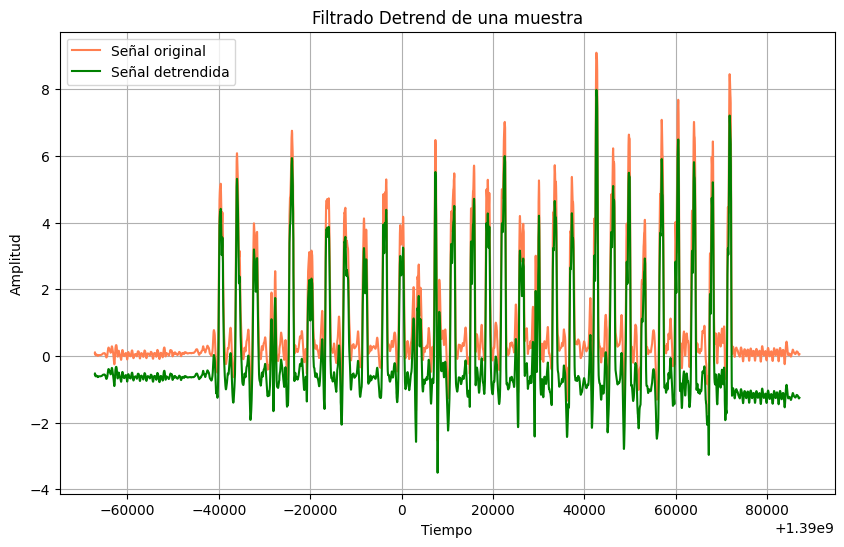

In [30]:
# Aplicar el filtrado detrend a la señal
detrended_signal = detrend(acc_x)

# Graficar la señal original y la señal detrendida
plt.figure(figsize=(10, 6))
plt.plot(unix_timestamp, acc_x, label='Señal original',  color='coral')
plt.plot(unix_timestamp, detrended_signal, label='Señal detrendida',  color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtrado Detrend de una muestra')
plt.legend()
plt.grid(True)
plt.show()

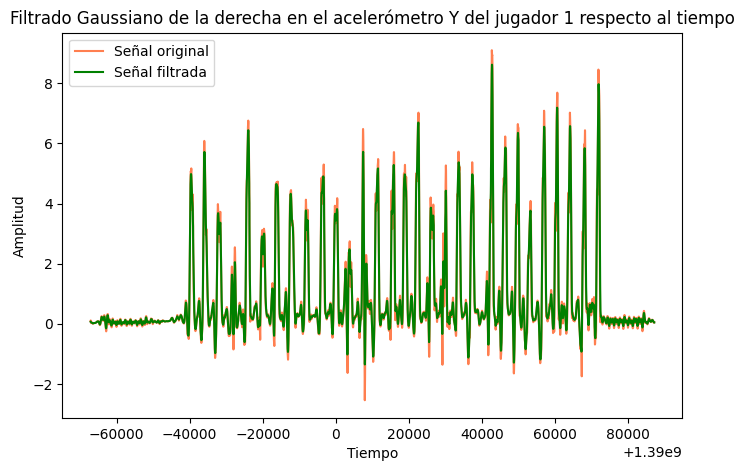

In [31]:

# Aplicar un filtro gaussiano a la señal ACC_X
filtered_signal = gaussian_filter(array_dreta['ACC_X'], sigma=5)  # sigma es el parámetro que controla el ancho del filtro gaussiano

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(8, 5))
plt.plot(array_dreta['UNIX_TIMESTAMP'], array_dreta['ACC_X'], label='Señal original', color='coral')
plt.plot(array_dreta['UNIX_TIMESTAMP'], filtered_signal, label='Señal filtrada', color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtrado Gaussiano de la derecha en el acelerómetro Y del jugador 1 respecto al tiempo')
plt.legend()
plt.grid(False)  # Quitar la cuadrícula del fondo
plt.show()

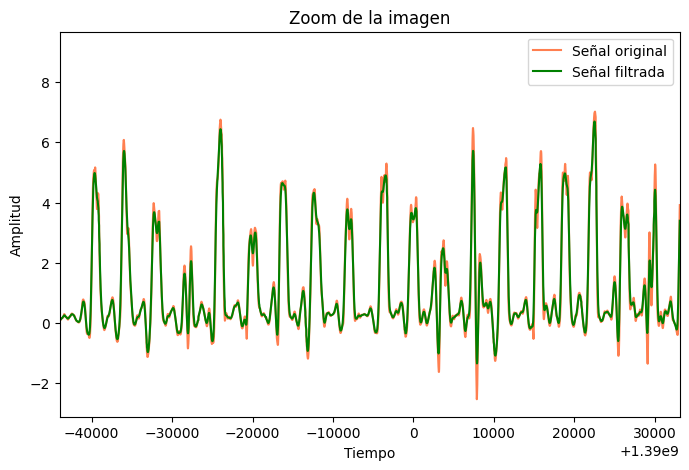

In [32]:

# Calcular el rango del 10% central de la muestra
total_points = len(array_dreta['UNIX_TIMESTAMP'])
start_index = int(total_points * 0.15)  # Inicio del 10% central
end_index = int(total_points * 0.65)    # Fin del 10% central

# Aplicar un filtro gaussiano a la señal ACC_X
filtered_signal = gaussian_filter(array_dreta['ACC_X'], sigma=5)  # sigma es el parámetro que controla el ancho del filtro gaussiano

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(8, 5))
plt.plot(array_dreta['UNIX_TIMESTAMP'], array_dreta['ACC_X'], label='Señal original', color='coral')
plt.plot(array_dreta['UNIX_TIMESTAMP'], filtered_signal, label='Señal filtrada', color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Zoom de la imagen')
plt.legend()
plt.grid(False)  # Quitar la cuadrícula del fondo

# Limitar el eje x al 10% central de la muestra
plt.xlim(array_dreta['UNIX_TIMESTAMP'][start_index], array_dreta['UNIX_TIMESTAMP'][end_index])

plt.show()

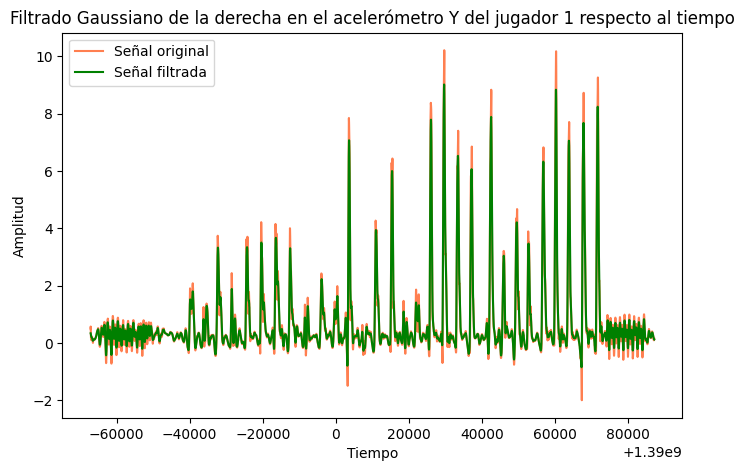

In [33]:

# Aplicar un filtro gaussiano a la señal ACC_Y
filtered_signal = gaussian_filter(array_dreta['ACC_Y'], sigma=5)  # sigma es el parámetro que controla el ancho del filtro gaussiano

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(8, 5))
plt.plot(array_dreta['UNIX_TIMESTAMP'], array_dreta['ACC_Y'], label='Señal original', color='coral')
plt.plot(array_dreta['UNIX_TIMESTAMP'], filtered_signal, label='Señal filtrada', color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtrado Gaussiano de la derecha en el acelerómetro Y del jugador 1 respecto al tiempo')
plt.legend()
plt.grid(False)  # Quitar la cuadrícula del fondo
plt.show()


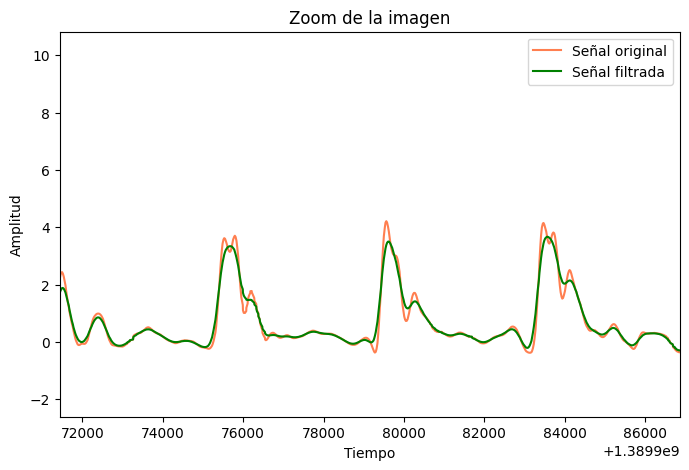

In [34]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Calcular el rango del 10% central de la muestra
total_points = len(array_dreta['UNIX_TIMESTAMP'])
start_index = int(total_points * 0.25)  # Inicio del 10% central
end_index = int(total_points * 0.35)    # Fin del 10% central

# Aplicar un filtro gaussiano a la señal ACC_X
filtered_signal = gaussian_filter(array_dreta['ACC_Y'], sigma=5)  # sigma es el parámetro que controla el ancho del filtro gaussiano

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(8, 5))
plt.plot(array_dreta['UNIX_TIMESTAMP'], array_dreta['ACC_Y'], label='Señal original', color='coral')
plt.plot(array_dreta['UNIX_TIMESTAMP'], filtered_signal, label='Señal filtrada', color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Zoom de la imagen')
plt.legend()
plt.grid(False)  # Quitar la cuadrícula del fondo

# Limitar el eje x al 10% central de la muestra
plt.xlim(array_dreta['UNIX_TIMESTAMP'][start_index], array_dreta['UNIX_TIMESTAMP'][end_index])

plt.show()


In [35]:
#realizamos el filtrado gausiano y la normalización

In [36]:
#derecha
#para eje x
# Eliminar la tendencia de la señal

array_dreta['ACC_X'] = gaussian_filter(array_dreta['ACC_X'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_dreta['ACC_X'] = (array_dreta['ACC_X'] - np.min(array_dreta['ACC_X'])) / (np.max(array_dreta['ACC_X']) - np.min(array_dreta['ACC_X']))

#para eje y

array_dreta['ACC_Y'] = gaussian_filter(array_dreta['ACC_Y'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_dreta['ACC_Y'] = (array_dreta['ACC_Y'] - np.min(array_dreta['ACC_Y'])) / (np.max(array_dreta['ACC_Y']) - np.min(array_dreta['ACC_Y']))

#para eje z

array_dreta['ACC_Z'] = gaussian_filter(array_dreta['ACC_Z'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_dreta['ACC_Z'] = (array_dreta['ACC_Z'] - np.min(array_dreta['ACC_Z'])) / (np.max(array_dreta['ACC_Z']) - np.min(array_dreta['ACC_Z']))


In [37]:

#smash
#para eje x
# Eliminar la tendencia de la señal

array_smash['ACC_X'] = gaussian_filter(array_smash['ACC_X'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_smash['ACC_X'] = (array_smash['ACC_X'] - np.min(array_smash['ACC_X'])) / (np.max(array_smash['ACC_X']) - np.min(array_smash['ACC_X']))

#para eje y

array_smash['ACC_Y'] = gaussian_filter(array_smash['ACC_Y'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_smash['ACC_Y'] = (array_smash['ACC_Y'] - np.min(array_smash['ACC_Y'])) / (np.max(array_smash['ACC_Y']) - np.min(array_smash['ACC_Y']))

#para eje z

array_smash['ACC_Z'] = gaussian_filter(array_smash['ACC_Z'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_smash['ACC_Z'] = (array_smash['ACC_Z'] - np.min(array_smash['ACC_Z'])) / (np.max(array_smash['ACC_Z']) - np.min(array_smash['ACC_Z']))


In [38]:
#servicio
#para eje x
# Eliminar la tendencia de la señal

array_serve['ACC_X'] = gaussian_filter(array_serve['ACC_X'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_serve['ACC_X'] = (array_serve['ACC_X'] - np.min(array_serve['ACC_X'])) / (np.max(array_serve['ACC_X']) - np.min(array_serve['ACC_X']))

#para eje y

array_serve['ACC_Y'] = gaussian_filter(array_serve['ACC_Y'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_serve['ACC_Y'] = (array_serve['ACC_Y'] - np.min(array_serve['ACC_Y'])) / (np.max(array_serve['ACC_Y']) - np.min(array_serve['ACC_Y']))

#para eje z

array_serve['ACC_Z'] = gaussian_filter(array_serve['ACC_Z'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_serve['ACC_Z'] = (array_serve['ACC_Z'] - np.min(array_serve['ACC_Z'])) / (np.max(array_serve['ACC_Z']) - np.min(array_serve['ACC_Z']))


In [39]:
#reves
#para eje x
# Eliminar la tendencia de la señal

array_reves['ACC_X'] = gaussian_filter(array_reves['ACC_X'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_reves['ACC_X'] = (array_reves['ACC_X'] - np.min(array_reves['ACC_X'])) / (np.max(array_reves['ACC_X']) - np.min(array_reves['ACC_X']))

#para eje y

array_reves['ACC_Y'] = gaussian_filter(array_reves['ACC_Y'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_reves['ACC_Y'] = (array_reves['ACC_Y'] - np.min(array_reves['ACC_Y'])) / (np.max(array_reves['ACC_Y']) - np.min(array_reves['ACC_Y']))

#para eje z

array_reves['ACC_Z'] = gaussian_filter(array_reves['ACC_Z'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_reves['ACC_Z'] = (array_reves['ACC_Z'] - np.min(array_reves['ACC_Z'])) / (np.max(array_reves['ACC_Z']) - np.min(array_reves['ACC_Z']))


In [40]:
#volea derecha
#para eje x
# Eliminar la tendencia de la señal

array_vd['ACC_X'] = gaussian_filter(array_vd['ACC_X'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_vd['ACC_X'] = (array_vd['ACC_X'] - np.min(array_vd['ACC_X'])) / (np.max(array_vd['ACC_X']) - np.min(array_vd['ACC_X']))

#para eje y

array_vd['ACC_Y'] = gaussian_filter(array_vd['ACC_Y'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_vd['ACC_Y'] = (array_vd['ACC_Y'] - np.min(array_vd['ACC_Y'])) / (np.max(array_vd['ACC_Y']) - np.min(array_vd['ACC_Y']))

#para eje z

array_vd['ACC_Z'] = gaussian_filter(array_vd['ACC_Z'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_vd['ACC_Z'] = (array_vd['ACC_Z'] - np.min(array_vd['ACC_Z'])) / (np.max(array_vd['ACC_Z']) - np.min(array_vd['ACC_Z']))


In [41]:
#volea reves
#para eje x
# Eliminar la tendencia de la señal

array_vr['ACC_X'] = gaussian_filter(array_vr['ACC_X'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_vr['ACC_X'] = (array_vr['ACC_X'] - np.min(array_vr['ACC_X'])) / (np.max(array_vr['ACC_X']) - np.min(array_vr['ACC_X']))

#para eje y

array_vr['ACC_Y'] = gaussian_filter(array_vr['ACC_Y'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_vr['ACC_Y'] = (array_vr['ACC_Y'] - np.min(array_vr['ACC_Y'])) / (np.max(array_vr['ACC_Y']) - np.min(array_vr['ACC_Y']))

#para eje z

array_vr['ACC_Z'] = gaussian_filter(array_vr['ACC_Z'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_vr['ACC_Z'] = (array_vr['ACC_Z'] - np.min(array_vr['ACC_Z'])) / (np.max(array_vr['ACC_Z']) - np.min(array_vr['ACC_Z']))


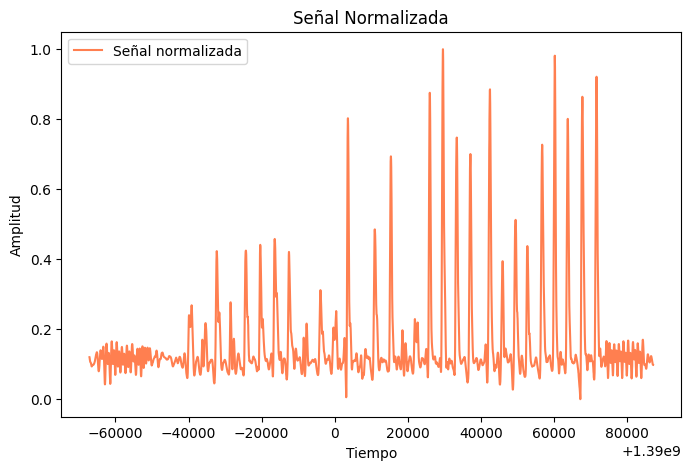

In [42]:

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(8, 5))
plt.plot(array_dreta['UNIX_TIMESTAMP'], array_dreta['ACC_Y'], label='Señal normalizada', color='coral')

plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal Normalizada')
plt.legend()
plt.grid(False)  # Quitar la cuadrícula del fondo
plt.show()


# DETECCION DE GOLPES

# DERECHA DE ACC

## Miramos para el eje x el y y el z, cuantos picos detecta

0.1647622562466403
0.23295908019517386
[1356 1536 1721 2128 2341 2508 2701 2906 3142 3327 3679 3877 4092 4242
 4423 4593 4795 4969 5153 5419 5599 5769 5937 6123 6298 6473 6670 6858]


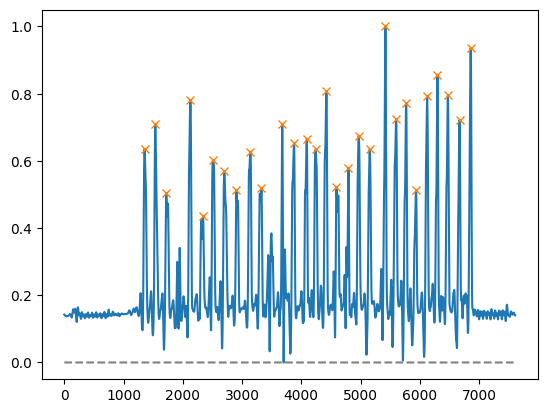

distancia media 203.77777777777777
numero total de golpes 28


In [43]:
#para x
peak_height = np.std(array_dreta['ACC_X'])
mean_signal = np.mean(array_dreta['ACC_X'])
print(peak_height)
print(mean_signal)

peaks, _ = find_peaks(array_dreta['ACC_X'], height=mean_signal + peak_height, distance = 100)
print(peaks)
plt.plot(array_dreta['ACC_X'])
plt.plot(peaks, array_dreta['ACC_X'][peaks], "x")
plt.plot(np.zeros_like(array_dreta['ACC_X']), "--", color="gray")
plt.show()
# Calcular la distancia entre los picos
distances_between_peaks = np.diff(peaks)

# Calcular la media de la distancia entre picos
mean_distance_between_peaks = np.mean(distances_between_peaks)
print('distancia media' ,mean_distance_between_peaks)
num_peaks = len(peaks)
print('numero total de golpes', num_peaks)

Altura del pico: 0.1380123889118755
Media de la señal: 0.15752663296846037


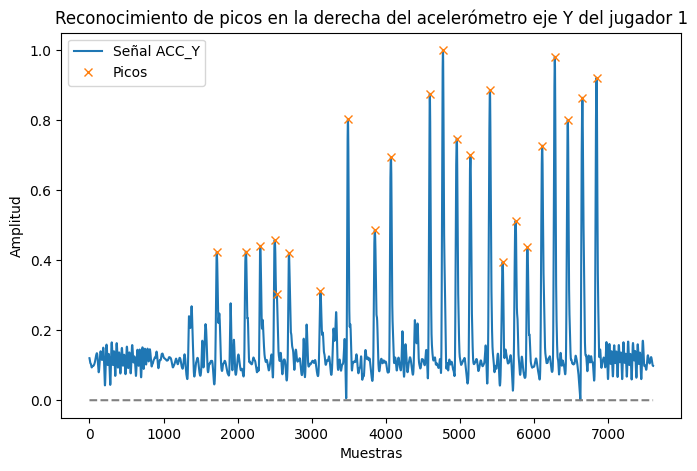

Distancia media entre picos: 233.04545454545453
Número total de picos: 23


In [44]:

# Calcular la altura del pico y la media de la señal
peak_height = np.std(array_dreta['ACC_Y'])
mean_signal = np.mean(array_dreta['ACC_Y'])
print("Altura del pico:", peak_height)
print("Media de la señal:", mean_signal)

# Encontrar picos en la señal ACC_Y
peaks, _ = find_peaks(array_dreta['ACC_Y'], height=mean_signal + peak_height, distance=2)

# Graficar la señal y los picos
plt.figure(figsize=(8, 5))
plt.plot(array_dreta['ACC_Y'], label='Señal ACC_Y')
plt.plot(peaks, np.array(array_dreta['ACC_Y'])[peaks], "x", label='Picos')
plt.plot(np.zeros_like(array_dreta['ACC_Y']), "--", color="gray")
plt.title('Reconocimiento de picos en la derecha del acelerómetro eje Y del jugador 1')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

# Calcular la distancia entre los picos
distances_between_peaks = np.diff(peaks)

# Calcular la media de la distancia entre picos
mean_distance_between_peaks = np.mean(distances_between_peaks)
print('Distancia media entre picos:', mean_distance_between_peaks)

# Número total de picos
num_peaks = len(peaks)
print('Número total de picos:', num_peaks)

0.16997448591233216
0.907693922664694


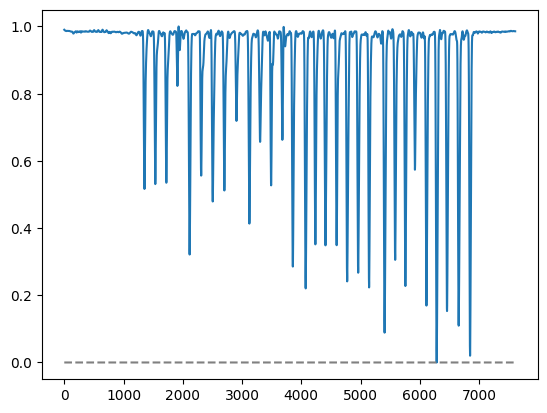

distancia media nan
numero total de golpes 0
entro aqui


C:\Users\Holacons\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Holacons\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


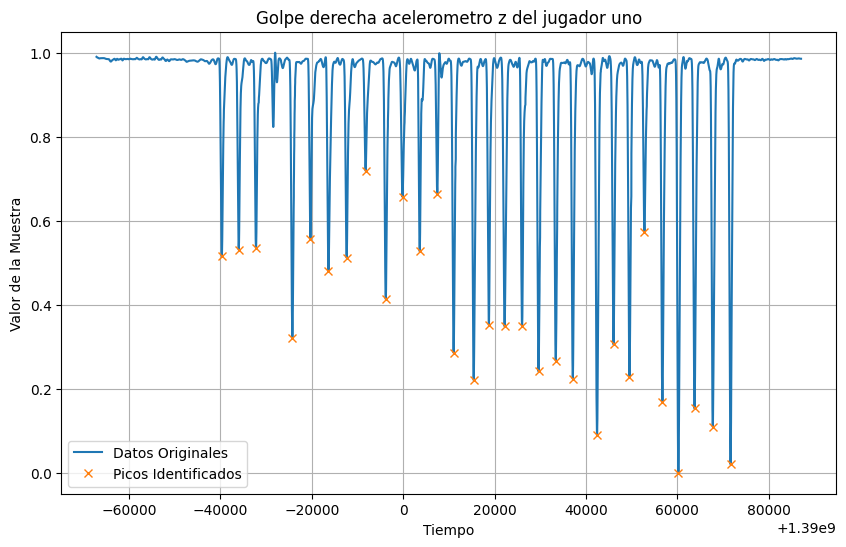

0.16997448591233216
-0.907693922664694
distancia media 196.25
numero total de golpes 29


In [45]:
#para el eje z

peak_height = np.std(array_dreta['ACC_Z'])
mean_signal = np.mean(array_dreta['ACC_Z'])
print(peak_height)
print(mean_signal)

peaks, _ = find_peaks(array_dreta['ACC_Z'], height=mean_signal + peak_height, distance = 100)

peaks_tiempo = array_dreta['UNIX_TIMESTAMP'][peaks]
plt.plot(array_dreta['ACC_Z'])
plt.plot(peaks, array_dreta['ACC_Z'][peaks], "x")
plt.plot(np.zeros_like(array_dreta['ACC_Z']), "--", color="gray")
plt.show()
# Calcular la distancia entre los picos
distances_between_peaks = np.diff(peaks)

# Calcular la media de la distancia entre picos
mean_distance_between_peaks = np.mean(distances_between_peaks)
print('distancia media' ,mean_distance_between_peaks)
num_peaks = len(peaks)
print('numero total de golpes', num_peaks)

if (mean_distance_between_peaks <=  100) and (mean_distance_between_peaks >=  150):
    plt.plot(array_dreta['ACC_Z'])
    plt.plot(peaks, array_dreta['ACC_Z'][peaks], "x")
    plt.plot(np.zeros_like(array_dreta['ACC_Z']), "--", color="gray")
    plt.show()
else:
    print('entro aqui')
    # Invertir el signo de los datos
    array1_z1_invertido = -array_dreta['ACC_Z']

    # Calcular la desviación estándar y la media del array invertido
    peak_height = np.std(array1_z1_invertido)
    mean_signal = np.mean(array1_z1_invertido)

    # Encontrar picos negativos
    peaks, _ = find_peaks(array1_z1_invertido, height=mean_signal + peak_height, distance=100)


    plt.figure(figsize=(10, 6))
    plt.plot(array_dreta['UNIX_TIMESTAMP'], array_dreta['ACC_Z'], label='Datos Originales')
    plt.plot(array_dreta['UNIX_TIMESTAMP'][peaks], array_dreta['ACC_Z'][peaks], 'x', label='Picos Identificados')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor de la Muestra')
    plt.title('Golpe derecha acelerometro z del jugador uno')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(peak_height)
    print(mean_signal)

    distances_between_peaks = np.diff(peaks)
    mean_distance_between_peaks = np.mean(distances_between_peaks)
    print('distancia media' ,mean_distance_between_peaks)
    num_peaks = len(peaks)
    print('numero total de golpes', num_peaks)





In [46]:
#creamos una funcion que calcule la media de la muestra 
#y si es menor que 0.5 busque puntos positivos y si es mayor que 0.5 busque puntos negativos

Media de la señal: 0.23295908019517386
Altura del pico: 0.1647622562466403
Distancia media entre picos: 203.77777777777777
Número total de golpes: 28


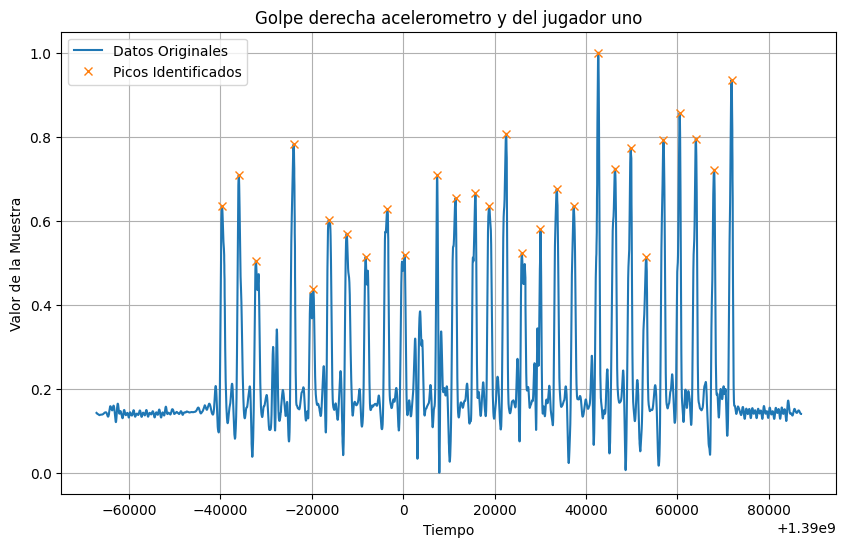

array([1356, 1536, 1721, 2128, 2341, 2508, 2701, 2906, 3142, 3327, 3679,
       3877, 4092, 4242, 4423, 4593, 4795, 4969, 5153, 5419, 5599, 5769,
       5937, 6123, 6298, 6473, 6670, 6858], dtype=int64)

In [47]:


def analyze_signal(array, eje):
    # Calcular la media de la señal ACC_Z
    mean_signal = np.mean(array[eje])
    print(f'Media de la señal: {mean_signal}')
    
    # Determinar si buscar picos positivos o negativos
    if mean_signal < 0.5:
        signal_to_analyze = array[eje]
        direction = "positive"
    else:
        signal_to_analyze = -array[eje]
        direction = "negative"
    
    # Calcular la desviación estándar
    peak_height = np.std(array[eje])
    
    # Ajustar el umbral de altura para los picos negativos
    height_threshold = mean_signal + peak_height if direction == "positive" else -mean_signal + peak_height
    
    # Encontrar picos en la señal
    peaks, _ = find_peaks(signal_to_analyze, height=height_threshold, distance=100)
    
    # Calcular la distancia entre los picos
    distances_between_peaks = np.diff(peaks)
    
    # Calcular la media de la distancia entre picos
    mean_distance_between_peaks = np.mean(distances_between_peaks)
    
    # Número total de picos
    num_peaks = len(peaks)
    
    print(f'Altura del pico: {peak_height}')
    print(f'Distancia media entre picos: {mean_distance_between_peaks}')
    print(f'Número total de golpes: {num_peaks}')
    
    # Graficar la señal y los picos
    plt.figure(figsize=(10, 6))
    plt.plot(array['UNIX_TIMESTAMP'], array[eje], label='Datos Originales')
    plt.plot(array['UNIX_TIMESTAMP'][peaks], array[eje][peaks], 'x', label='Picos Identificados')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor de la Muestra')
    plt.title('Golpe derecha acelerometro y del jugador uno')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return peaks



# Llamar a la función con los datos
analyze_signal(array_dreta, 'ACC_X')


Media de la señal: 0.15752663296846037
Altura del pico: 0.1380123889118755
Distancia media entre picos: 244.14285714285714
Número total de golpes: 22


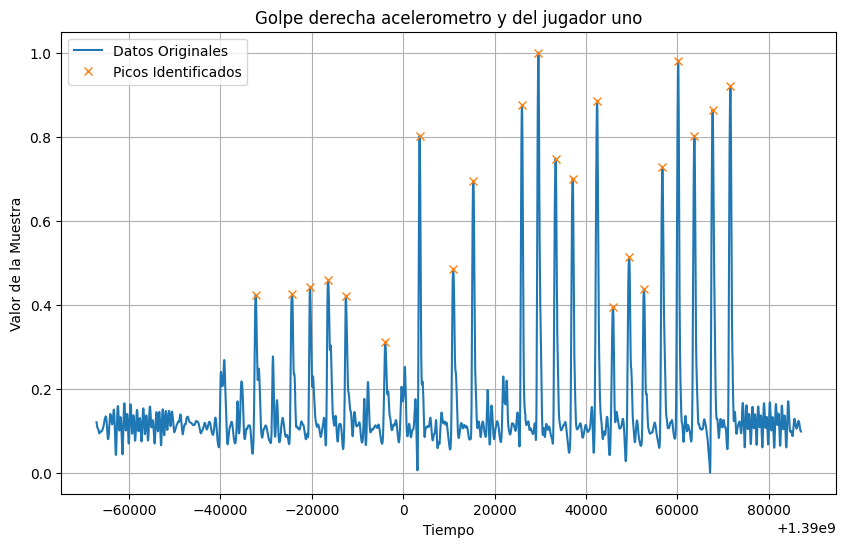

In [48]:
# Llamar a la función con los datos
peaks = analyze_signal(array_dreta, 'ACC_Y')

Media de la señal: 0.907693922664694
Altura del pico: 0.16997448591233216
Distancia media entre picos: 196.25
Número total de golpes: 29


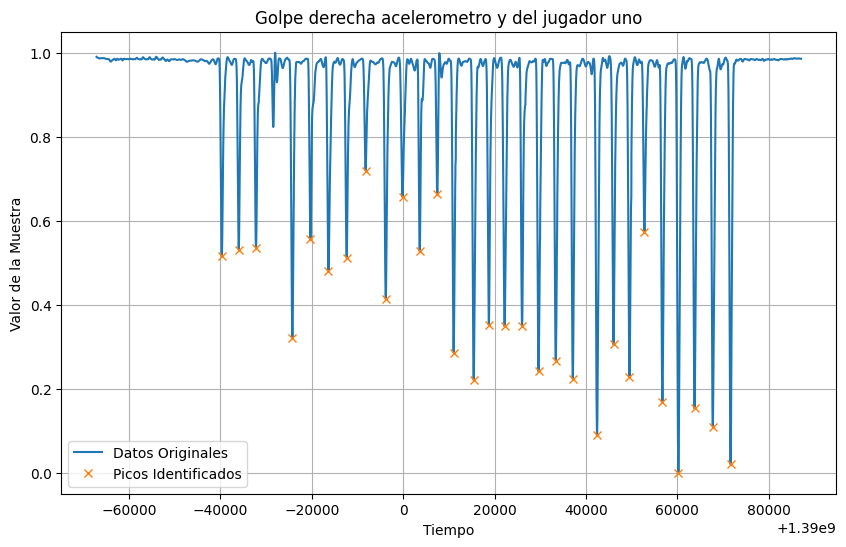

In [49]:
# Llamar a la función con los datos
peaks = analyze_signal(array_dreta, 'ACC_Z')

In [50]:
#Escogemos uno de los ejes para decidir la cantidad de golpe

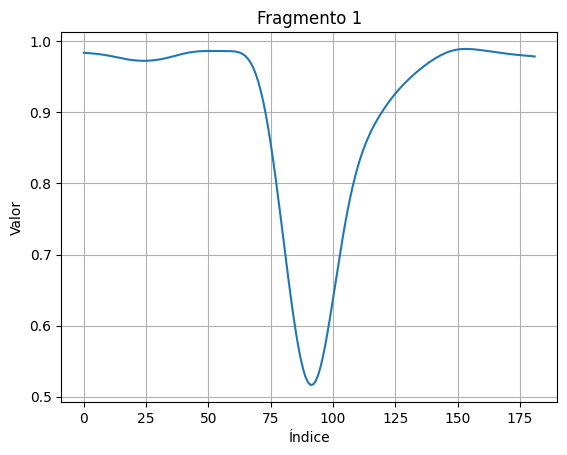

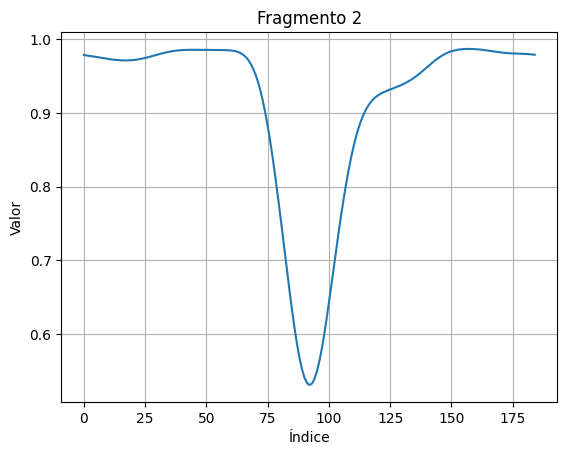

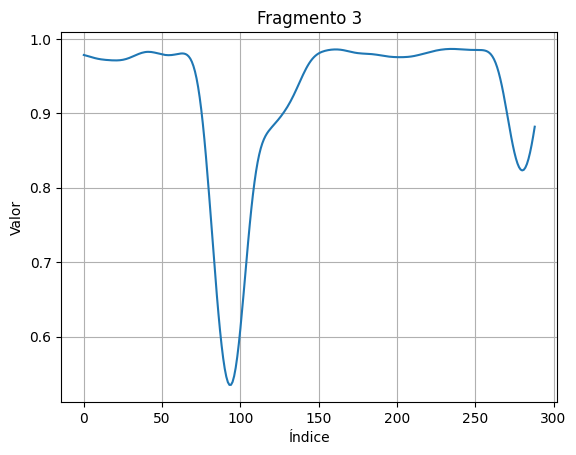

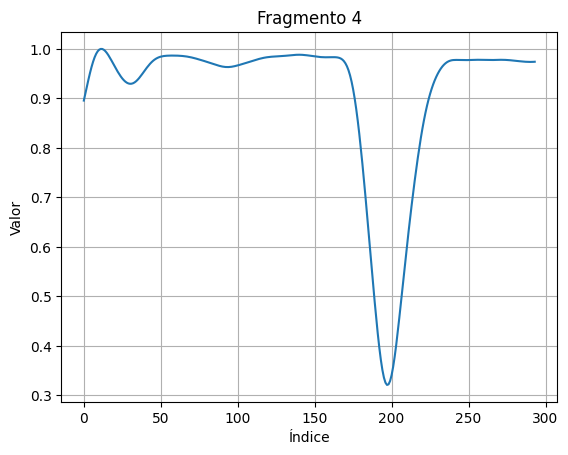

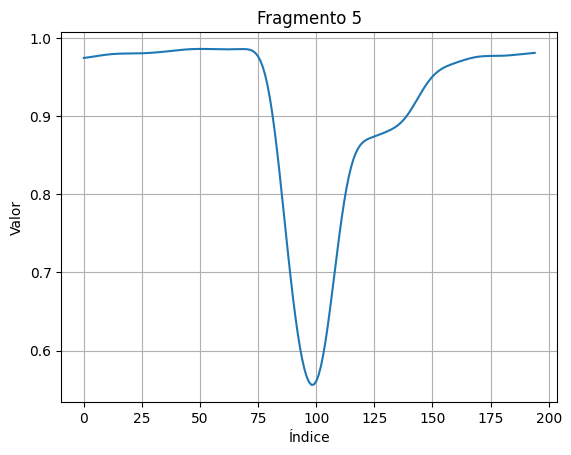

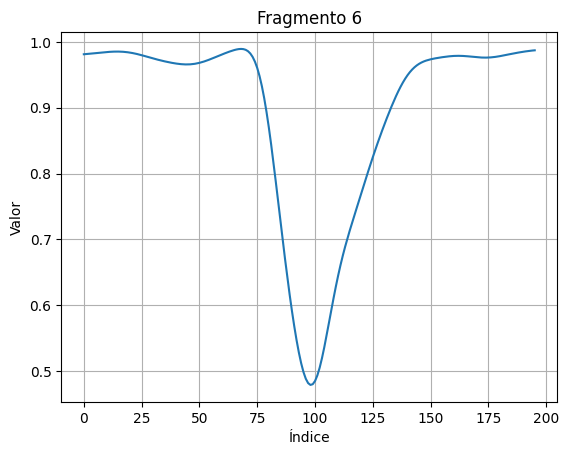

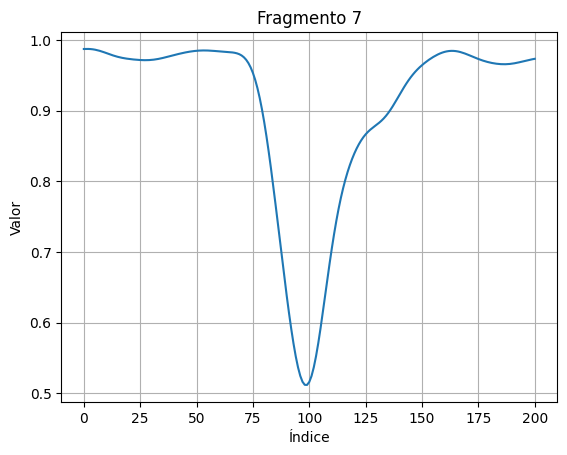

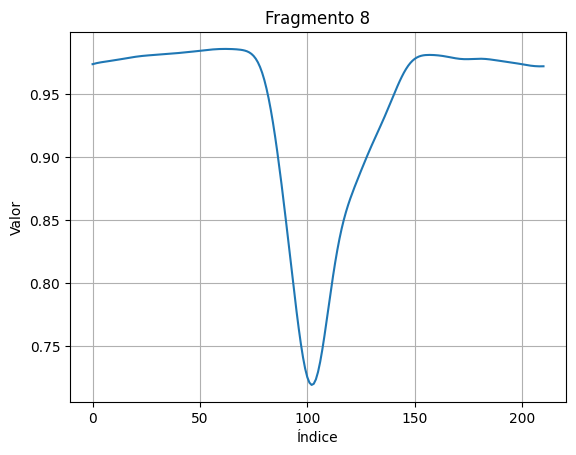

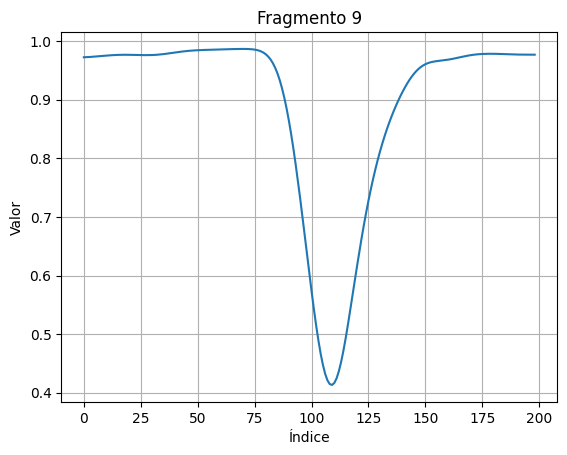

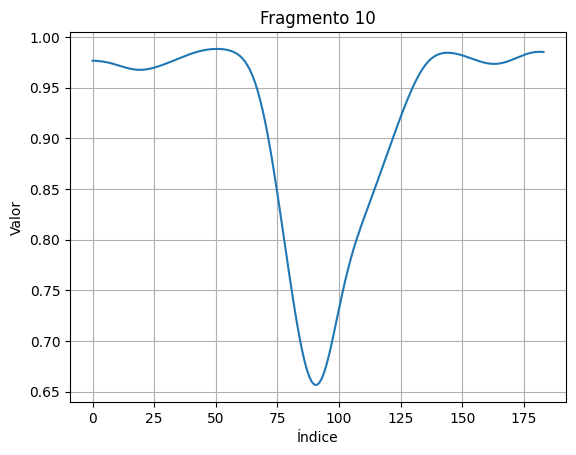

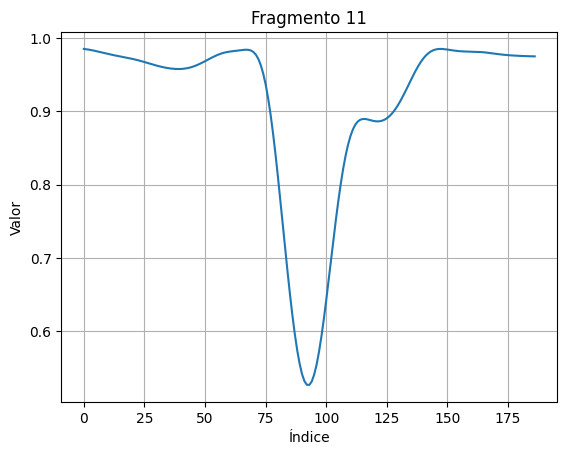

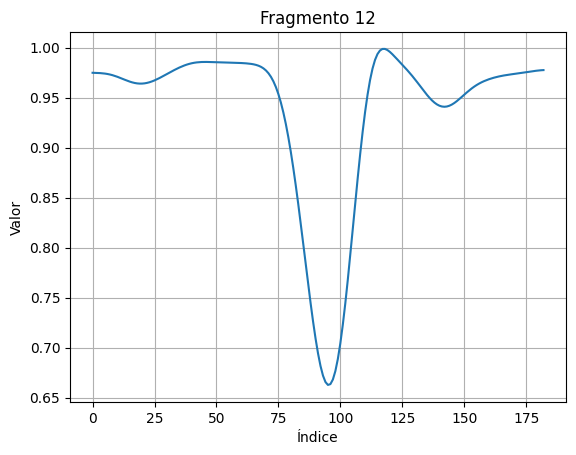

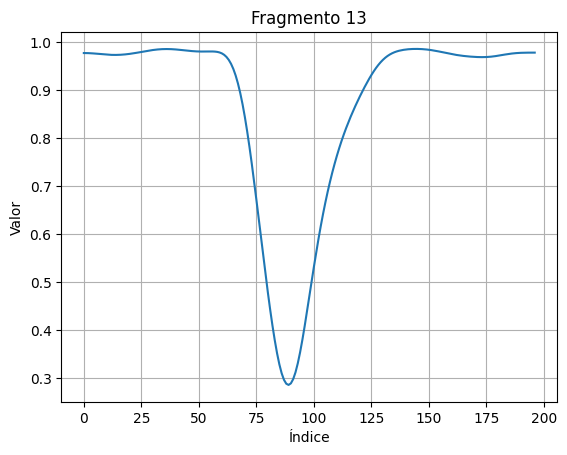

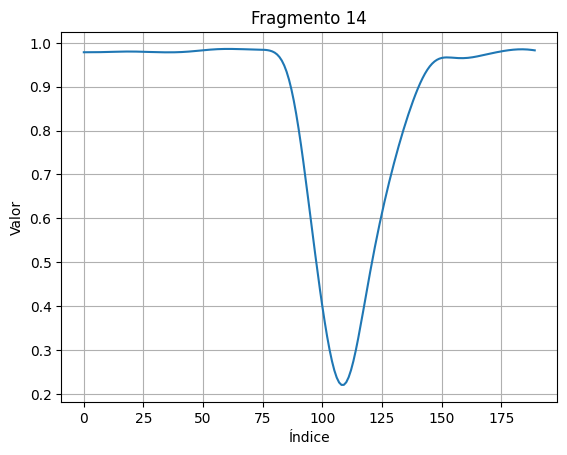

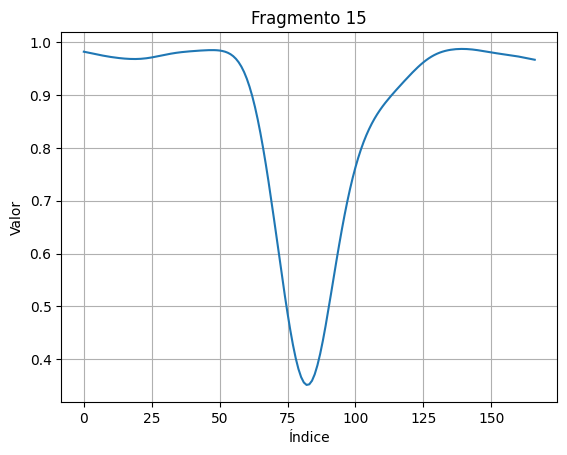

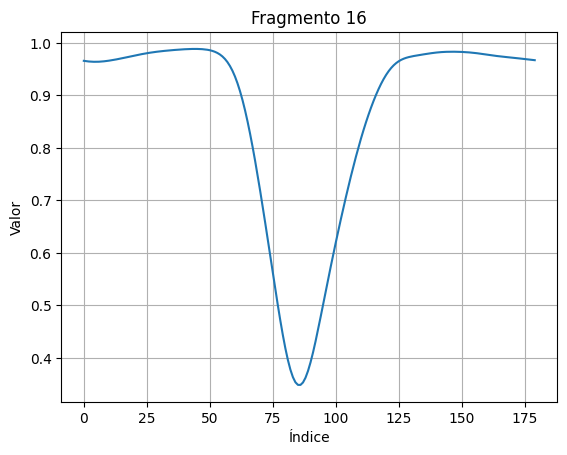

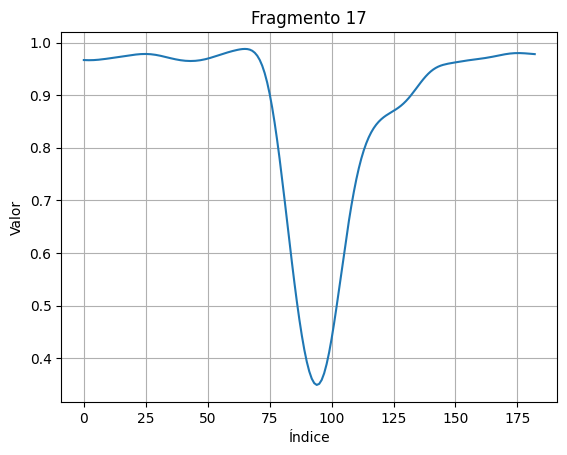

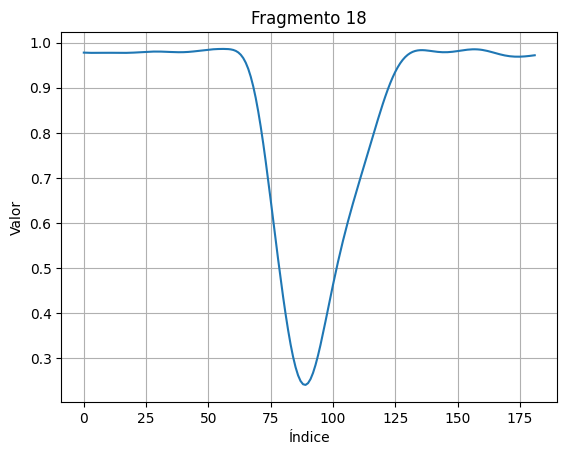

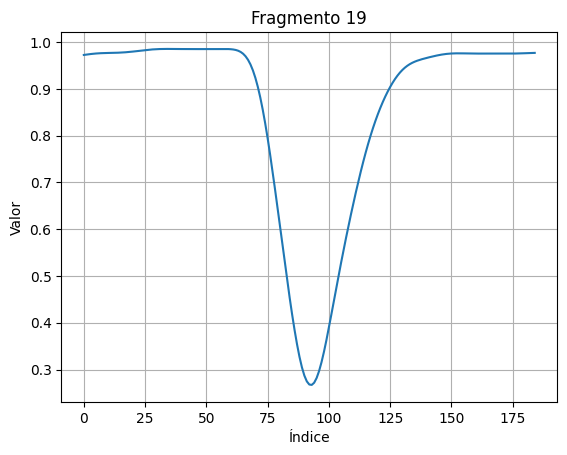

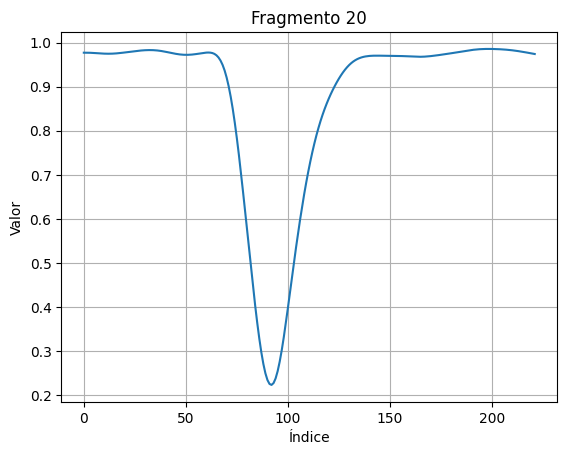

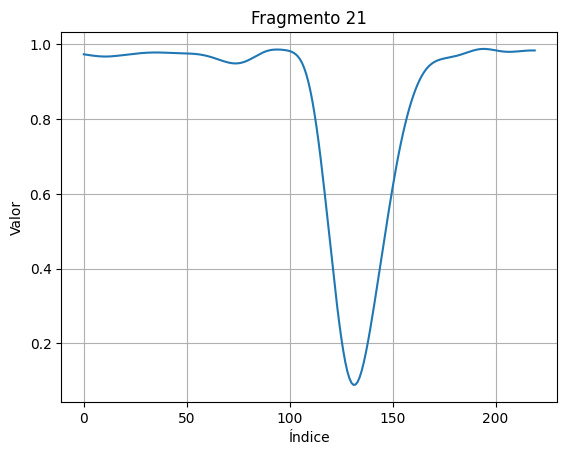

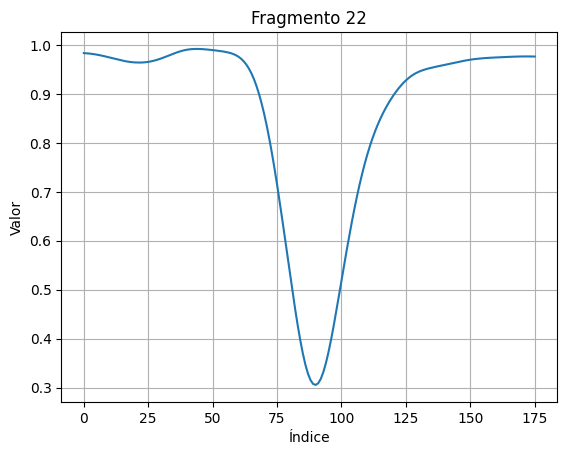

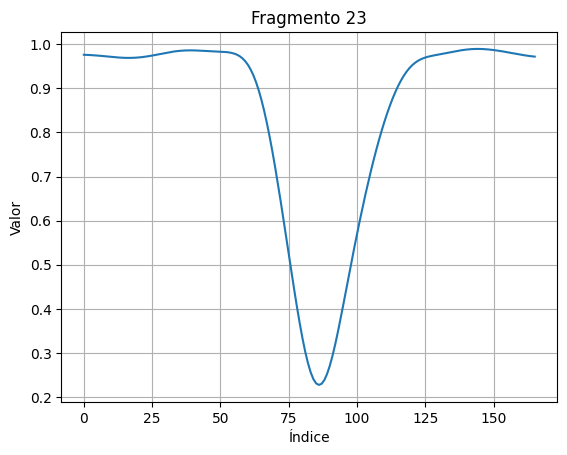

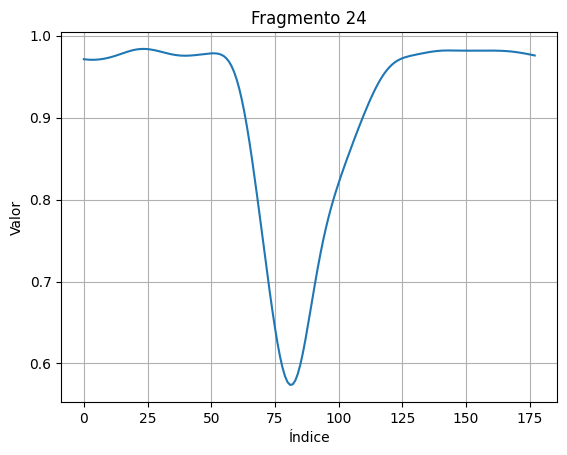

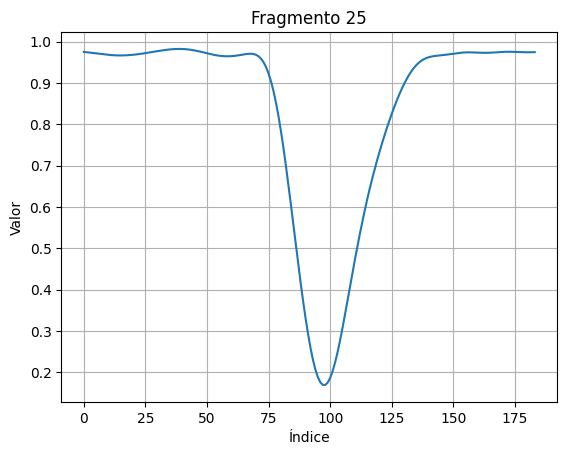

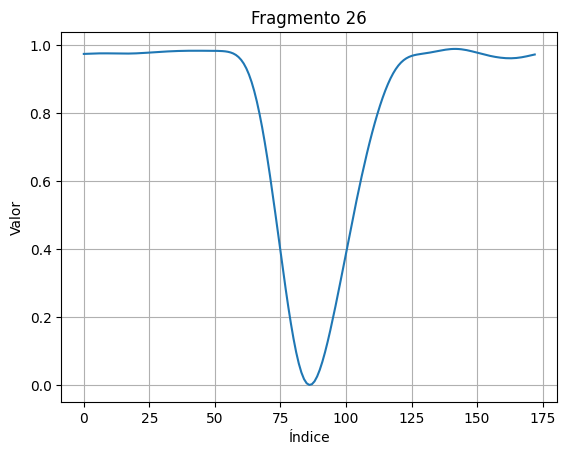

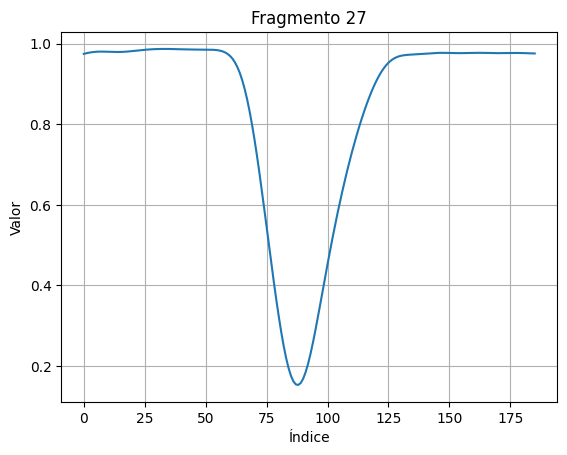

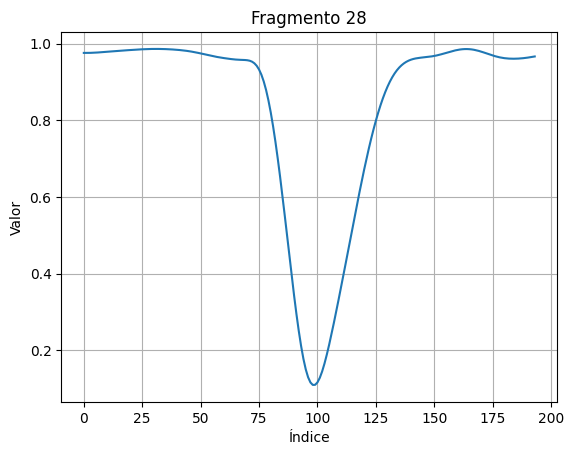

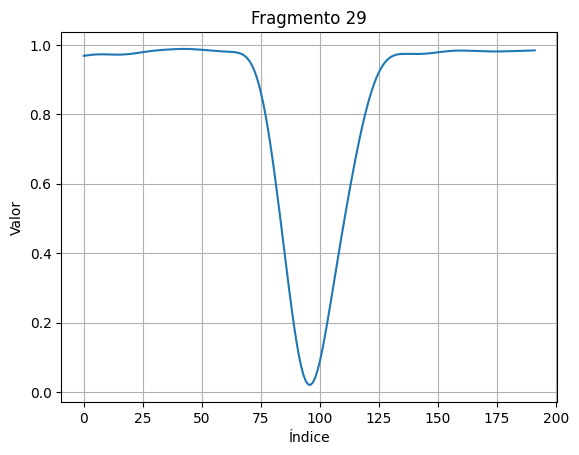

In [51]:
fragments = []

# Fragmentar la señal alrededor de cada pico y plotear cada fragmento
for i, peak_index in enumerate(peaks):
    print 
    if i == 0:
        start_index = peak_index - int(distances_between_peaks[i] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    elif i == len(peaks)-1:
        start_index = peak_index - int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i-1] / 2)
    else:
        start_index = peaks[i-1] + int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    fragment = array_dreta[start_index:end_index]
    
    fragment_values = fragment['ACC_Z']
    
    # Plotear el fragmento
    plt.figure()
    plt.plot(fragment_values)
    plt.title(f"Fragmento {i+1}")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()
    
    fragments.append(fragment)
    
    

    

In [52]:

# # Directorio donde se guardarán los archivos CSV
# directory = "C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/fragmentos"

# # Si el directorio no existe, créalo
# if not os.path.exists(directory):
#     os.makedirs(directory)

# # Itera sobre los fragmentos y guárdalos como archivos CSV
# for i, fragment in enumerate(fragments):
#     # Nombre del archivo CSV
#     filename = os.path.join(directory, f"derecha_J1_{i+1}.csv")
    
#     # Abre el archivo CSV en modo escritura
#     with open(filename, mode='w', newline='') as file:
#         writer = csv.writer(file)
        
#         # Escribe los datos del fragmento en el archivo CSV
#         for row in fragment:
#             writer.writerow(row)


# REVES DE ACC

In [53]:
#realizamos lo mismo para el reves 

Media de la señal: 0.2859847675293018
Altura del pico: 0.14812431342727553
Distancia media entre picos: 186.07407407407408
Número total de golpes: 28


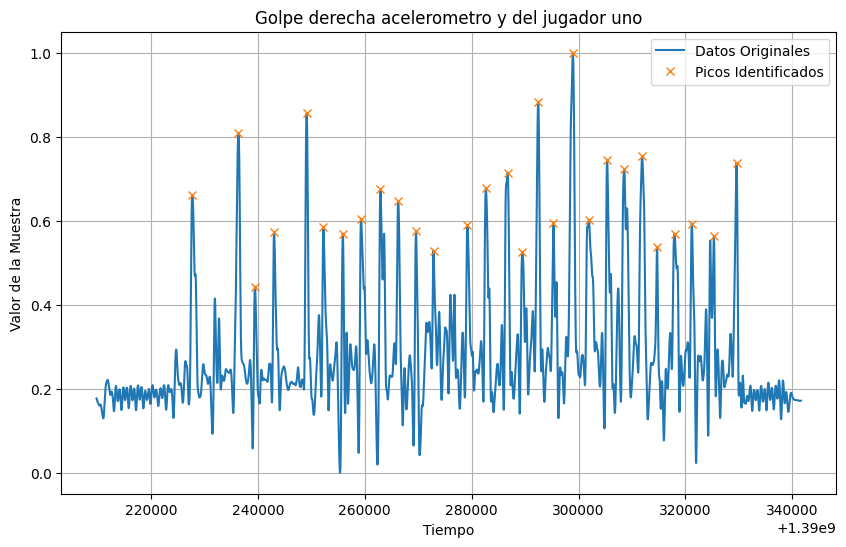

In [54]:
# Llamar a la función con los datos
peaks = analyze_signal(array_reves, 'ACC_X')

Media de la señal: 0.3112257410650071
Altura del pico: 0.07624333359961981
Distancia media entre picos: 218.17391304347825
Número total de golpes: 24


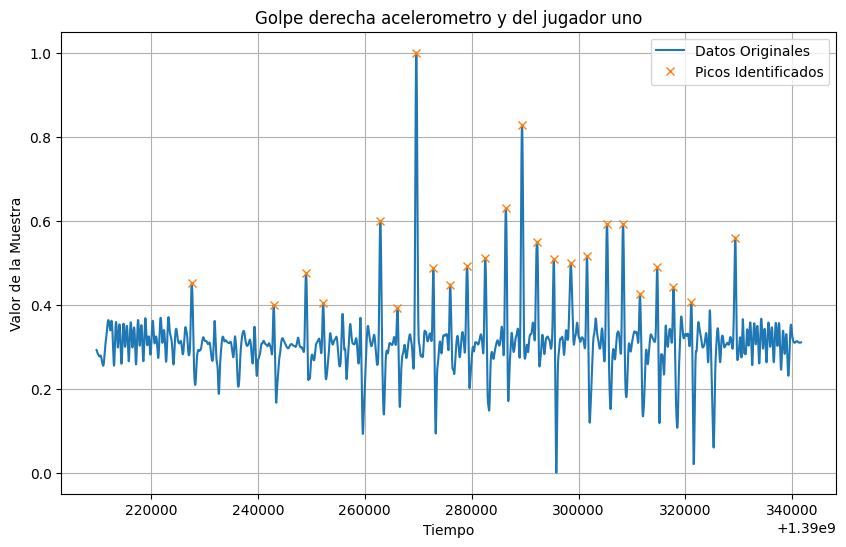

In [55]:
peaks = analyze_signal(array_reves, 'ACC_Y')

Media de la señal: 0.8504696657204525
Altura del pico: 0.1593372921179215
Distancia media entre picos: 185.59259259259258
Número total de golpes: 28


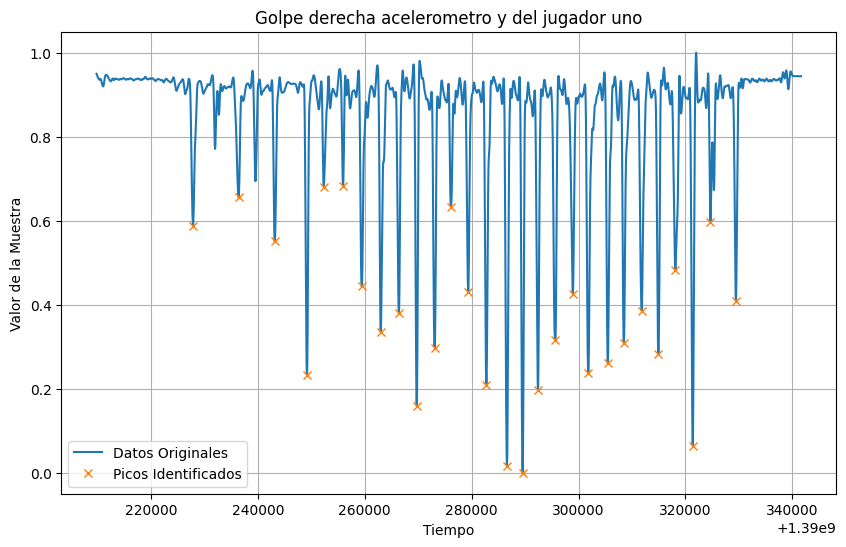

In [56]:
peaks = analyze_signal(array_reves, 'ACC_Z')

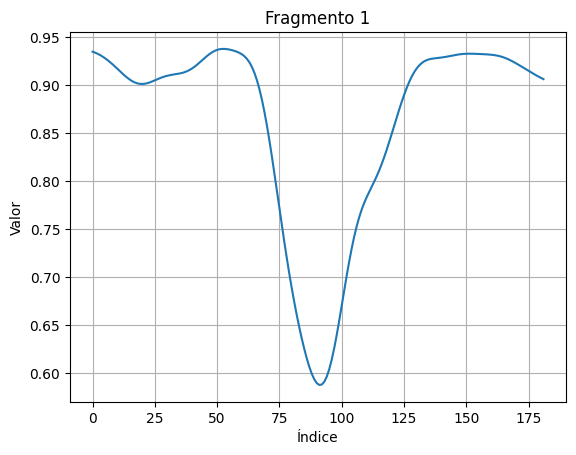

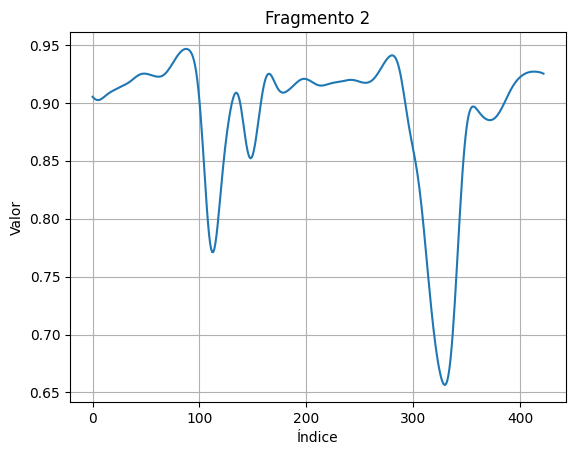

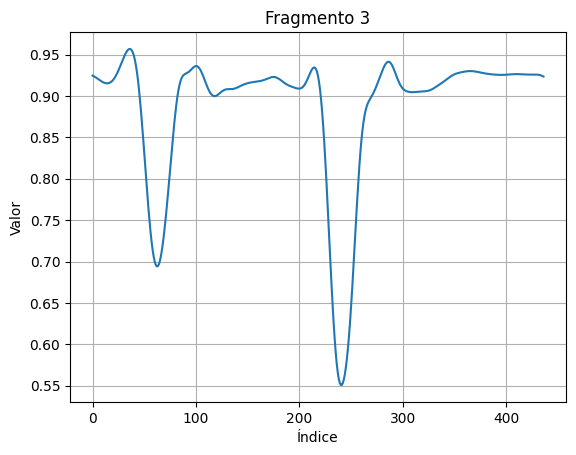

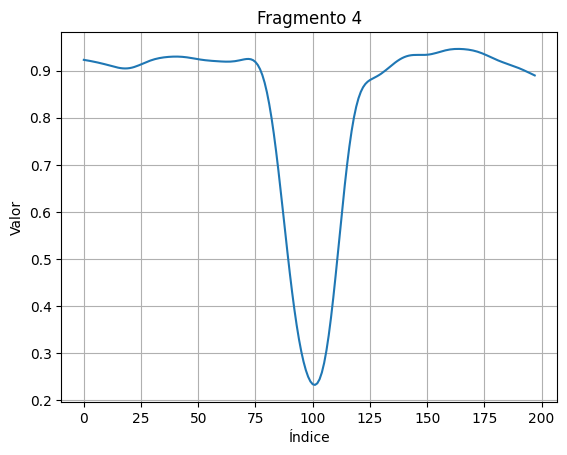

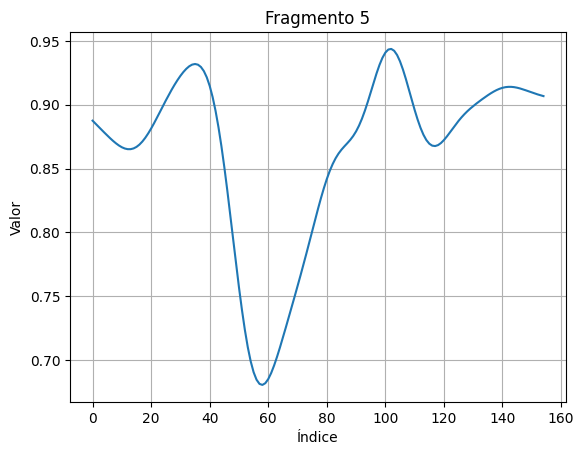

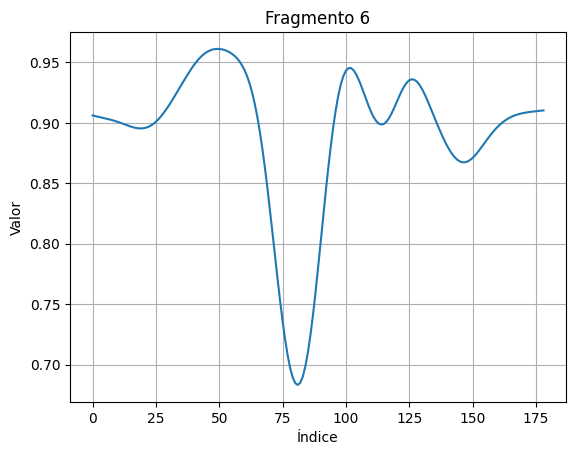

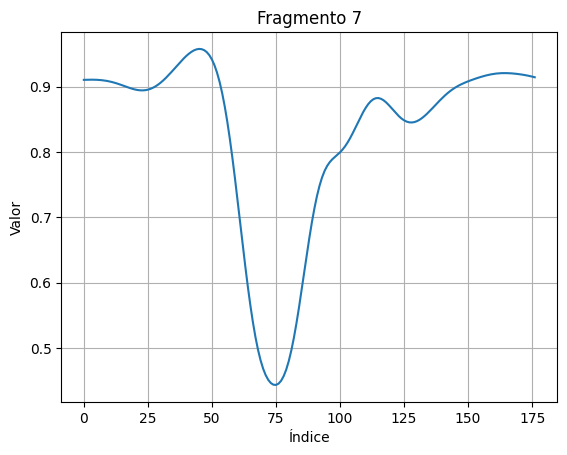

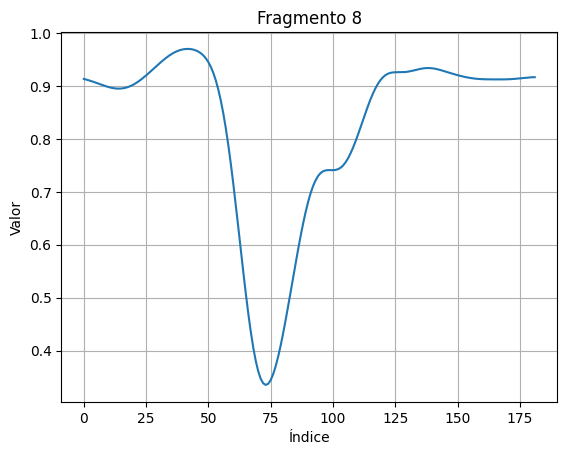

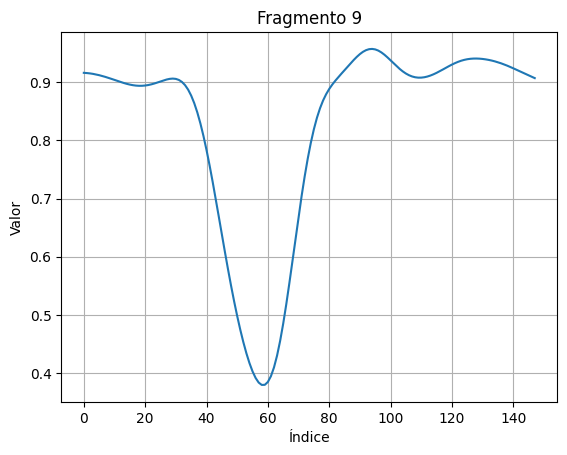

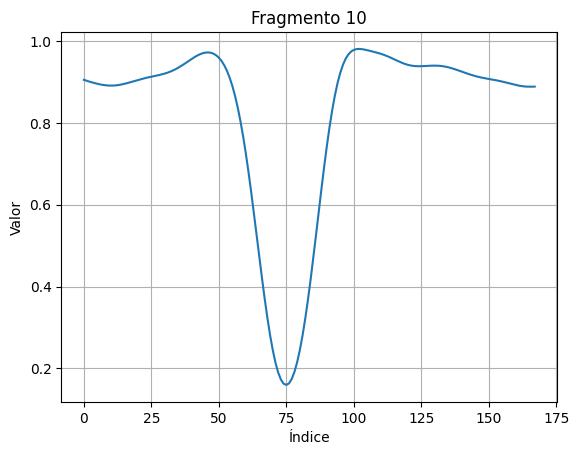

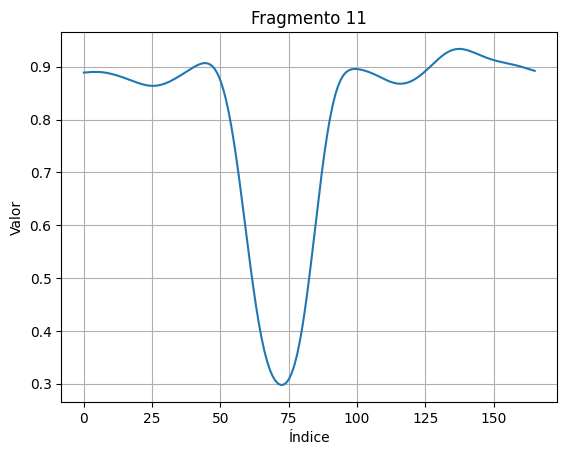

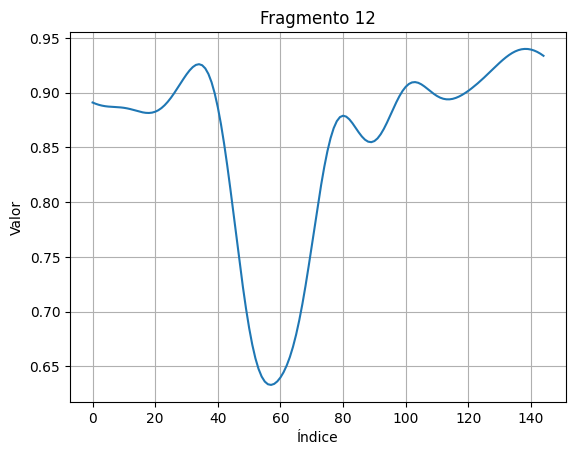

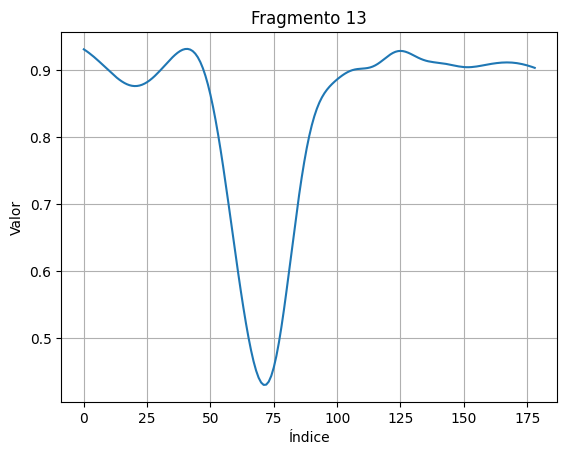

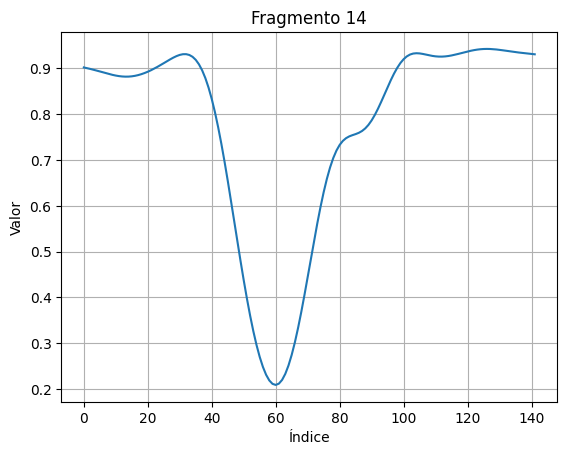

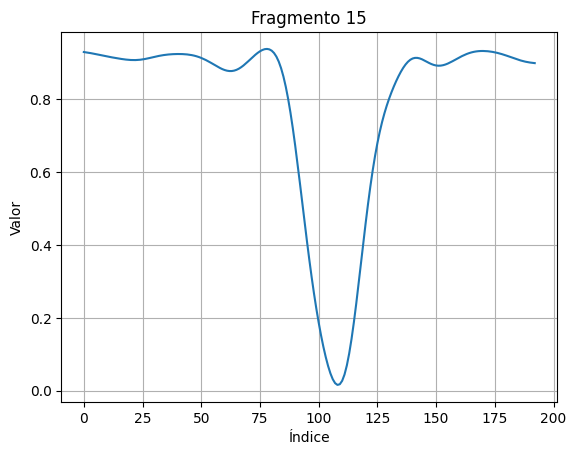

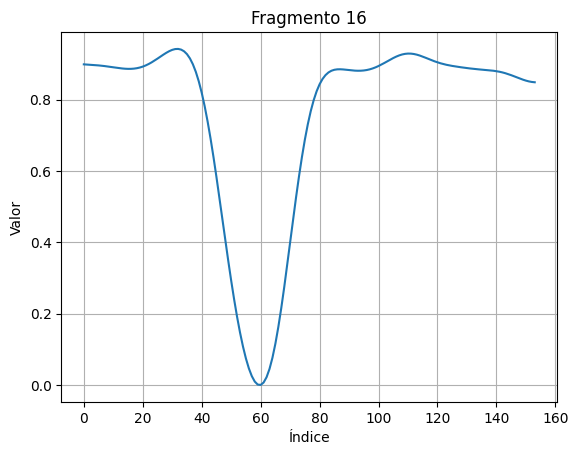

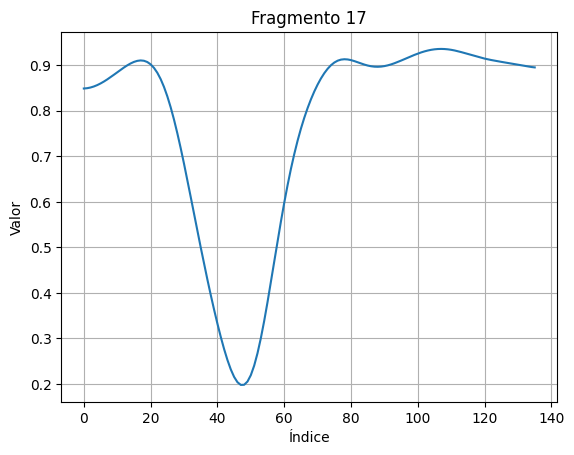

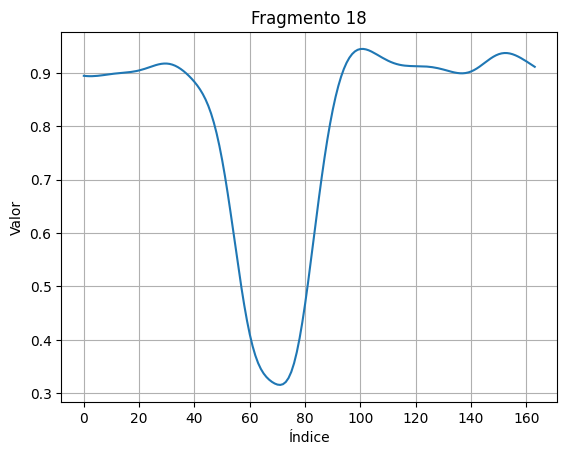

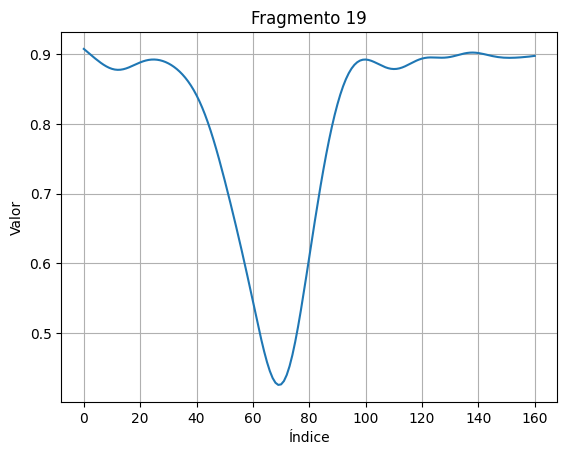

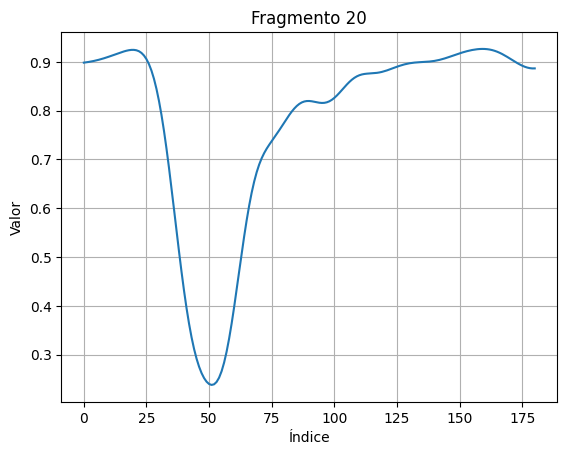

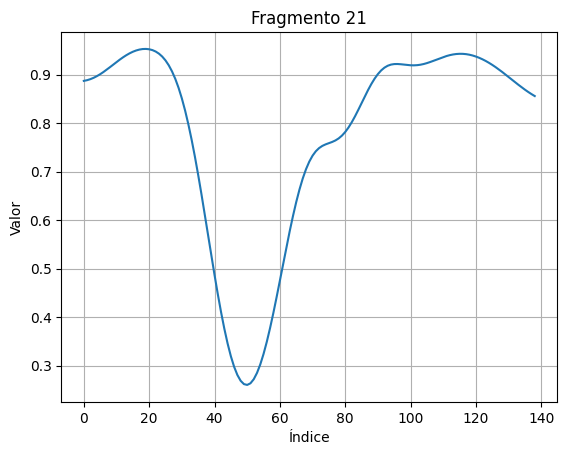

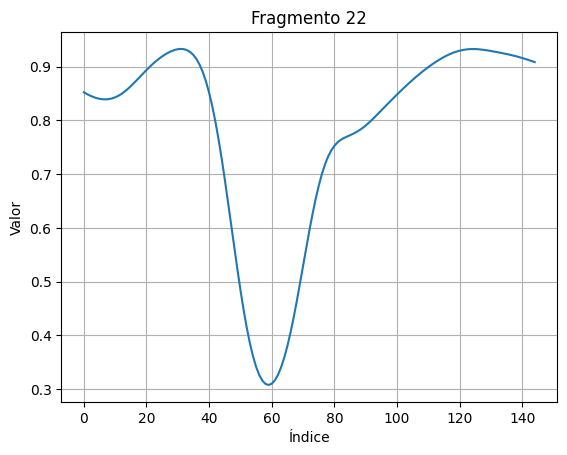

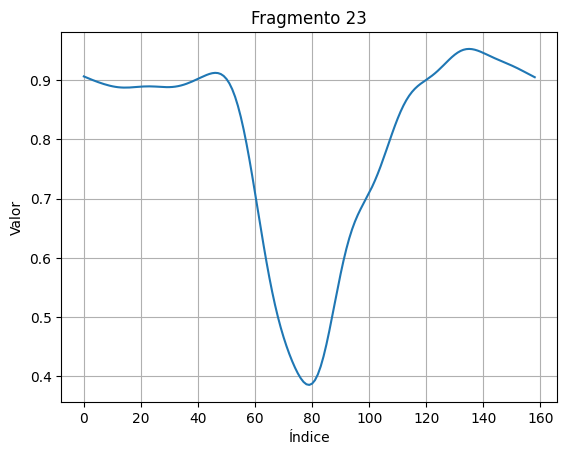

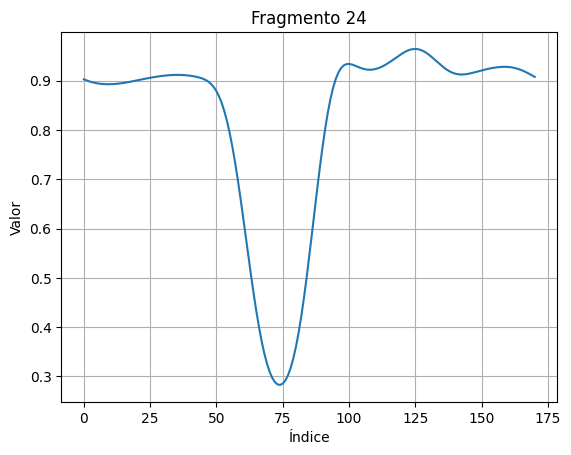

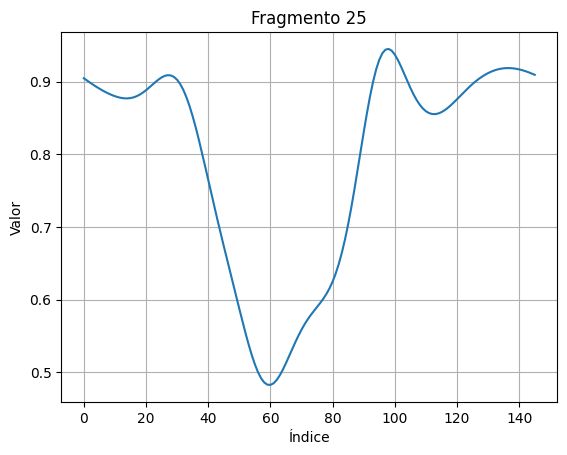

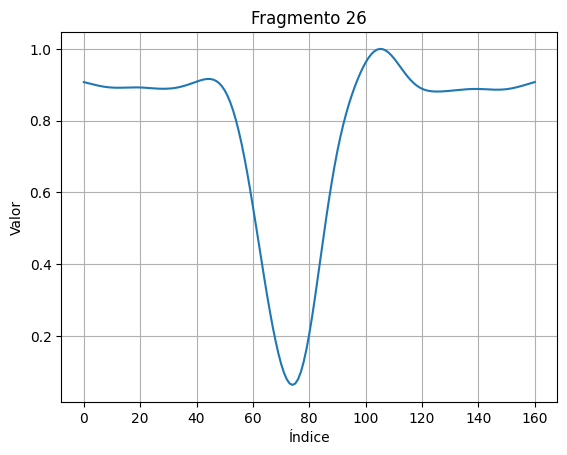

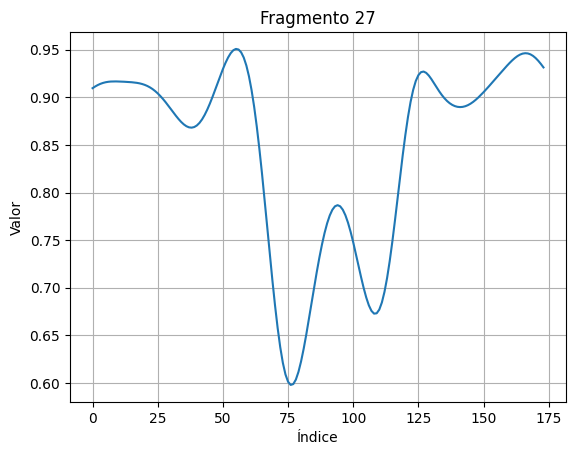

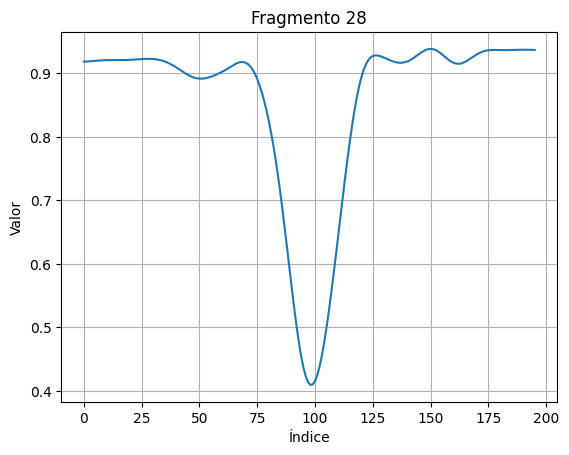

In [57]:
fragments = []

# Fragmentar la señal alrededor de cada pico y plotear cada fragmento
for i, peak_index in enumerate(peaks):
    print 
    if i == 0:
        start_index = peak_index - int(distances_between_peaks[i] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    elif i == len(peaks)-1:
        start_index = peak_index - int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i-1] / 2)
    else:
        start_index = peaks[i-1] + int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    fragment = array_reves[start_index:end_index]
    
    # Obtener la segunda columna de cada fragmento
    fragment_values = fragment['ACC_Z']
    
    # Plotear el fragmento
    plt.figure()
    plt.plot(fragment_values)
    plt.title(f"Fragmento {i+1}")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()
    
    fragments.append(fragment)
    
    



In [58]:

# # Directorio donde se guardarán los archivos CSV
# directory = "C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/fragmentos"

# # Si el directorio no existe, se crea
# if not os.path.exists(directory):
#     os.makedirs(directory)

# # Itera sobre los fragmentos y guárdalos como archivos CSV
# for i, fragment in enumerate(fragments):
#     # Nombre del archivo CSV
#     filename = os.path.join(directory, f"reves_J1_{i+1}.csv")
    
#     # Abre el archivo CSV en modo escritura
#     with open(filename, mode='w', newline='') as file:
#         writer = csv.writer(file)
        
#         # Escribe los datos del fragmento en el archivo CSV
#         for row in fragment:
#             writer.writerow(row)

# SERVICIO ACC

Media de la señal: 0.24275487880799332
Altura del pico: 0.1281457908291223
Distancia media entre picos: 275.15384615384613
Número total de golpes: 14


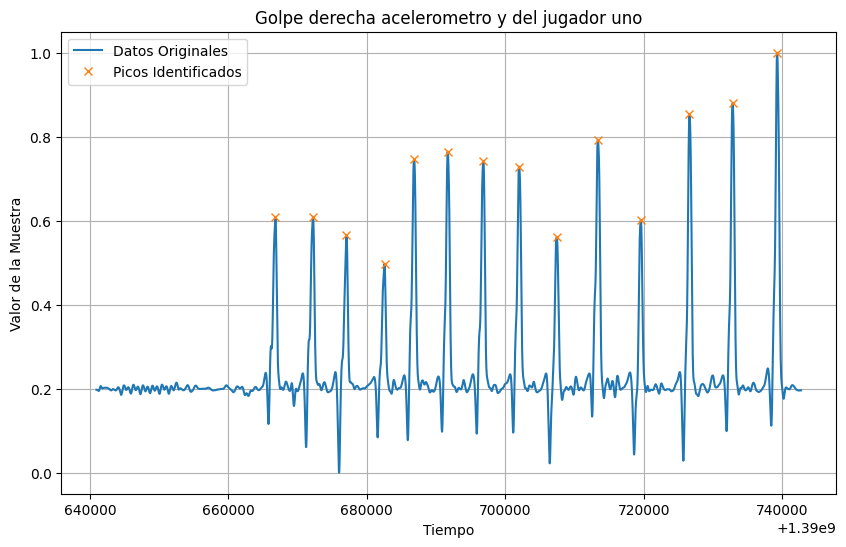

In [59]:

peaks = analyze_signal(array_serve, 'ACC_X')

Media de la señal: 0.45654920750436717
Altura del pico: 0.12458240267598972
Distancia media entre picos: 275.53846153846155
Número total de golpes: 14


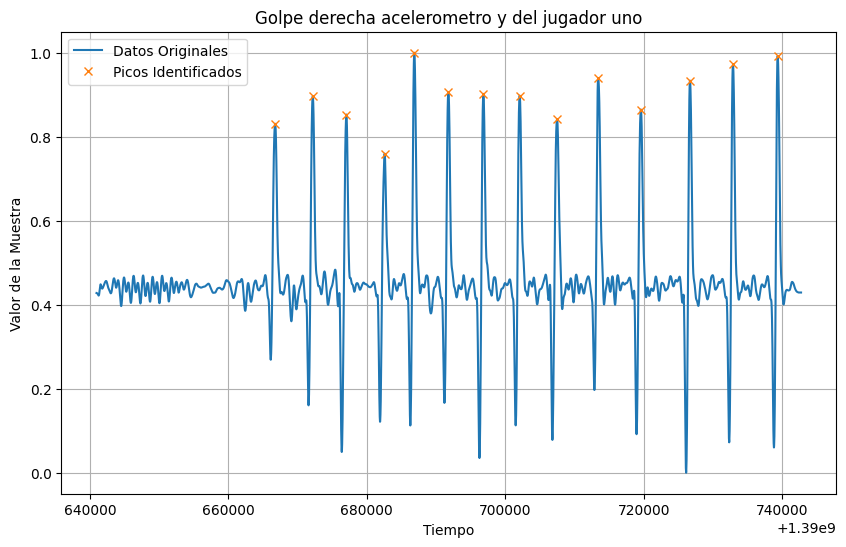

In [60]:
peaks = analyze_signal(array_serve, 'ACC_Y')

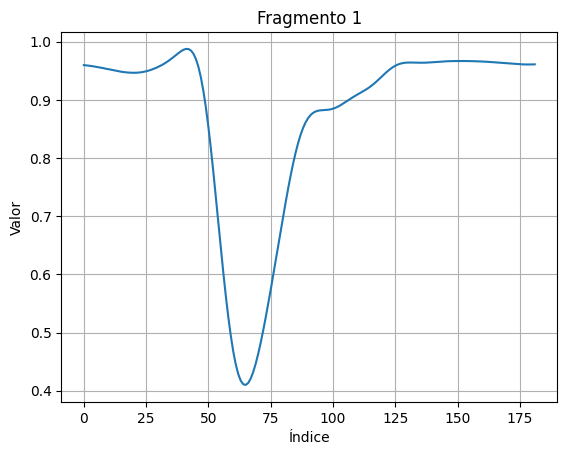

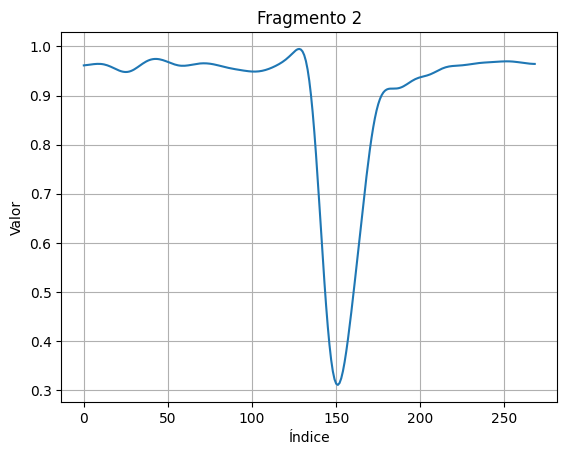

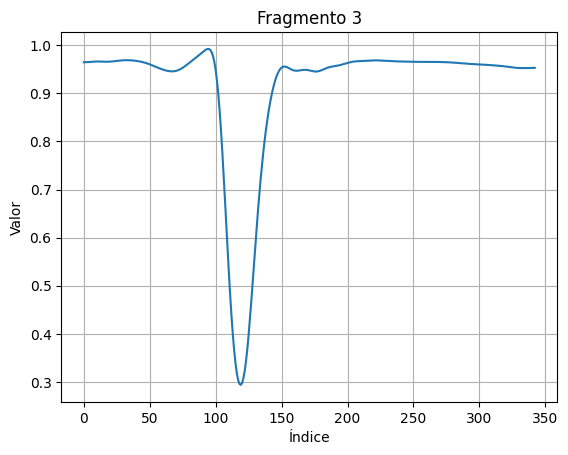

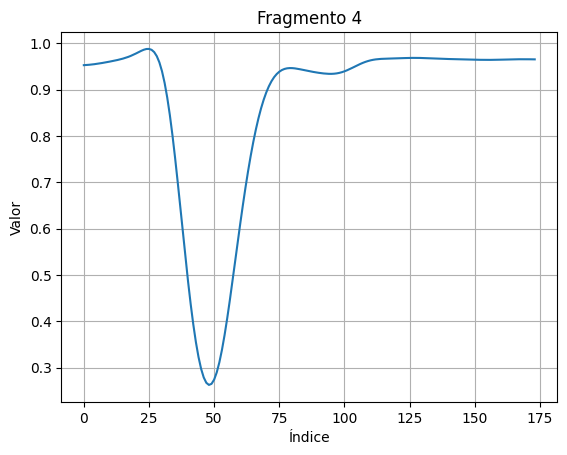

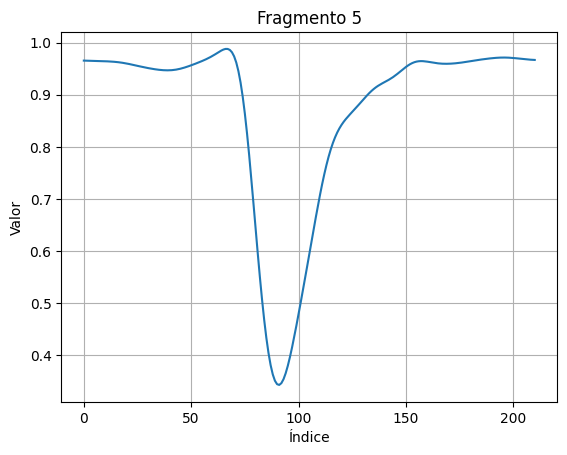

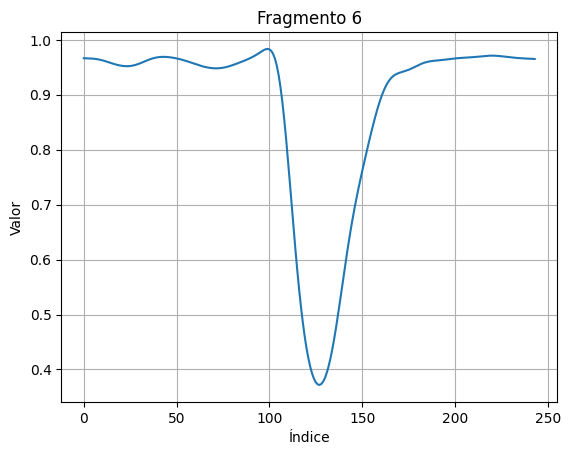

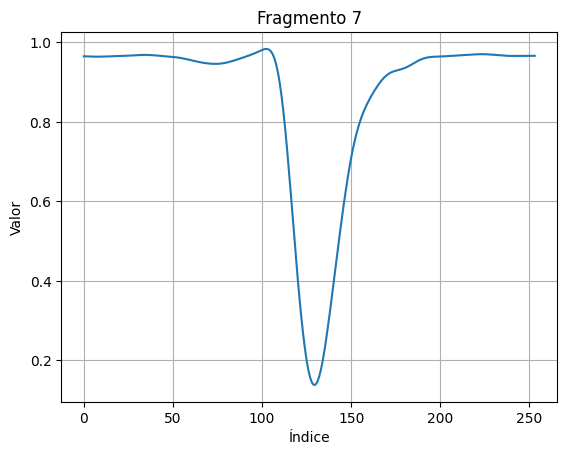

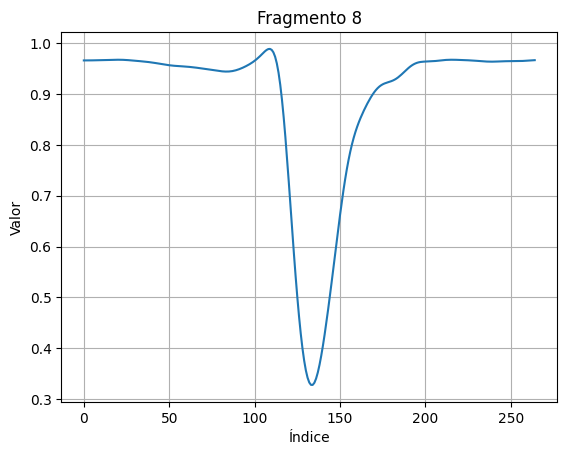

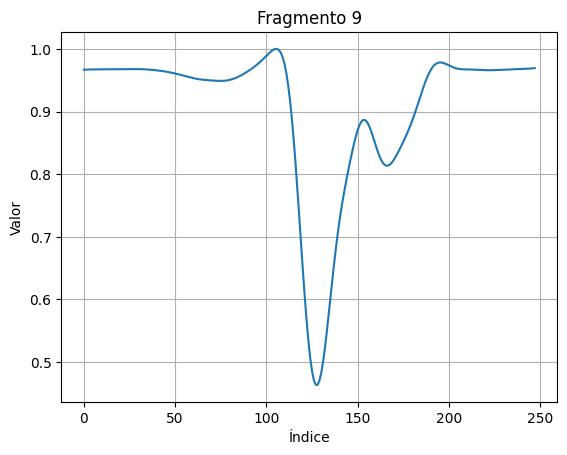

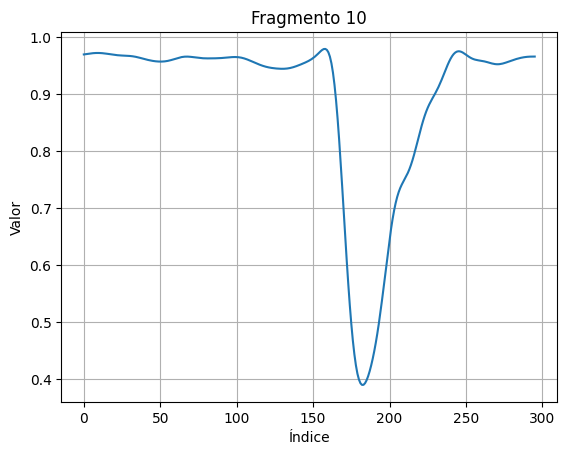

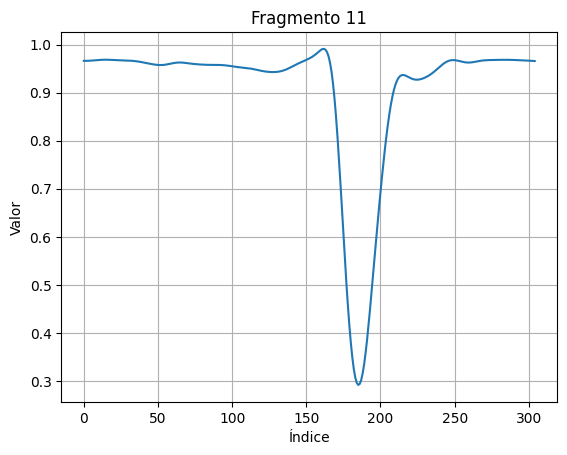

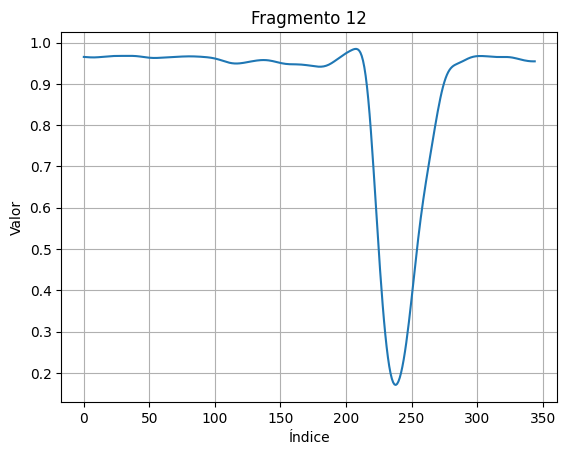

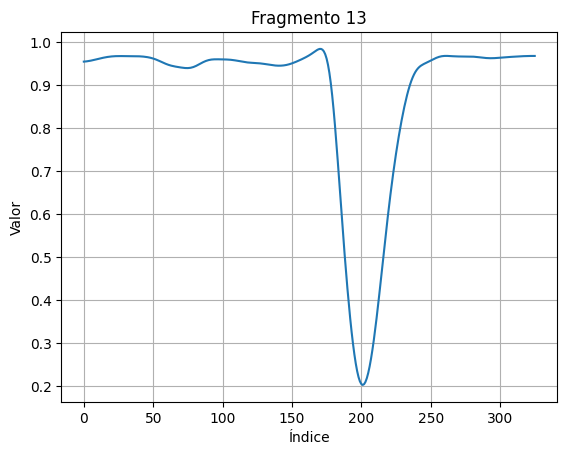

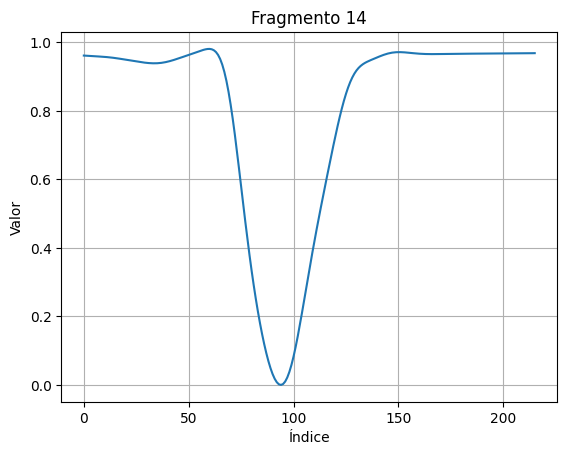

In [61]:
fragments = []

# Fragmentar la señal alrededor de cada pico y plotear cada fragmento
for i, peak_index in enumerate(peaks):
    print 
    if i == 0:
        start_index = peak_index - int(distances_between_peaks[i] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    elif i == len(peaks)-1:
        start_index = peak_index - int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i-1] / 2)
    else:
        start_index = peaks[i-1] + int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    fragment = array_serve[start_index:end_index]
    
    # Obtener la segunda columna de cada fragmento
    fragment_values = fragment['ACC_Z']
    
    # Plotear el fragmento
    plt.figure()
    plt.plot(fragment_values)
    plt.title(f"Fragmento {i+1}")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()
    
    fragments.append(fragment)
    
    


In [62]:

# # Directorio donde se guardarán los archivos CSV
# directory = "C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/fragmentos"

# # Si el directorio no existe, créalo
# if not os.path.exists(directory):
#     os.makedirs(directory)

# # Itera sobre los fragmentos y guárdalos como archivos CSV
# for i, fragment in enumerate(fragments):
#     # Nombre del archivo CSV
#     filename = os.path.join(directory, f"serve_J1_{i+1}.csv")
    
#     # Abre el archivo CSV en modo escritura
#     with open(filename, mode='w', newline='') as file:
#         writer = csv.writer(file)
        
#         # Escribe los datos del fragmento en el archivo CSV
#         for row in fragment:
#             writer.writerow(row)

# SMASH ACC

Media de la señal: 0.3640113211902193
Altura del pico: 0.0900238351920996
Distancia media entre picos: 197.6153846153846
Número total de golpes: 14


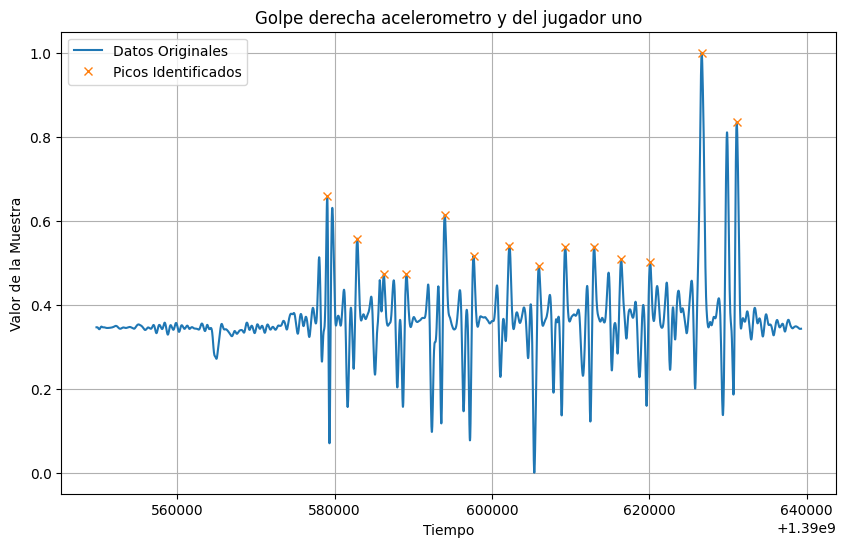

In [63]:

peaks = analyze_signal(array_smash, 'ACC_X')

Media de la señal: 0.34152023349725236
Altura del pico: 0.06998786394766021
Distancia media entre picos: 195.3846153846154
Número total de golpes: 14


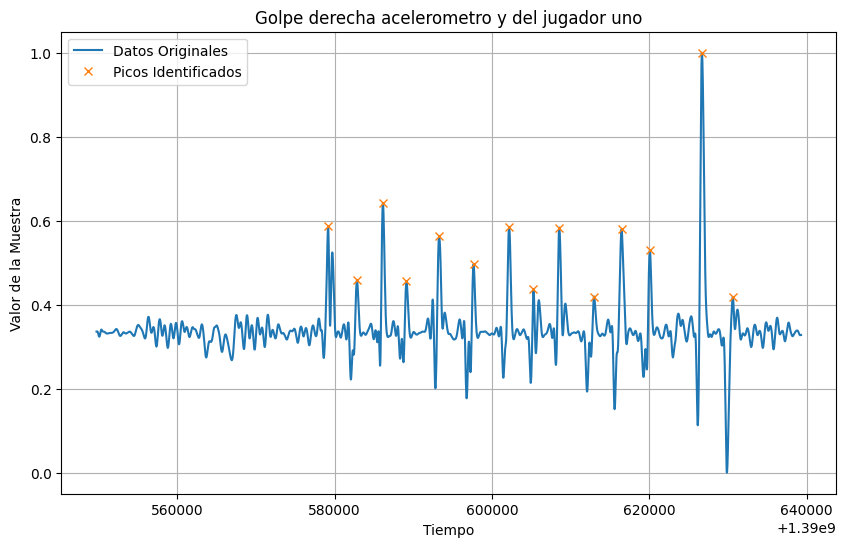

In [64]:
peaks = analyze_signal(array_smash, 'ACC_Y')

Media de la señal: 0.7642837797272809
Altura del pico: 0.07100254988491654
Distancia media entre picos: 259.75
Número total de golpes: 13


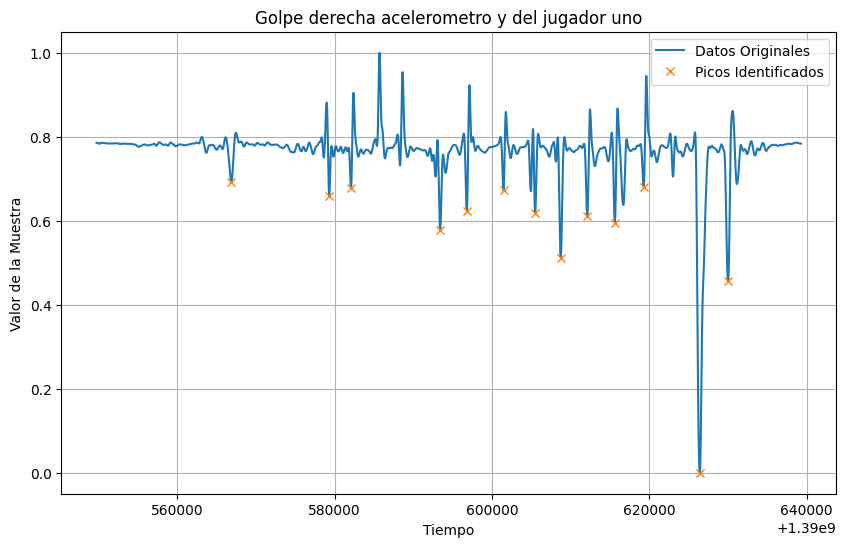

In [65]:
peaks = analyze_signal(array_smash, 'ACC_Z')

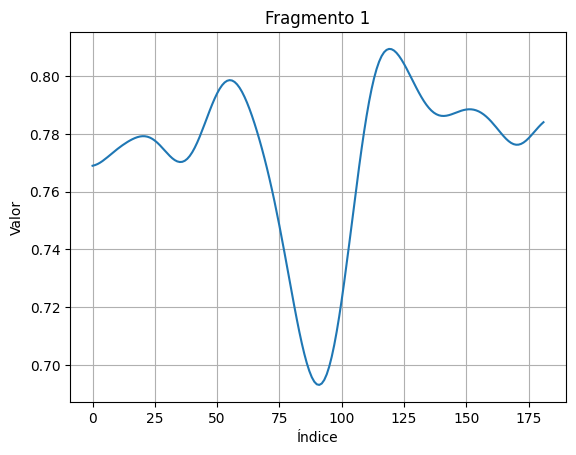

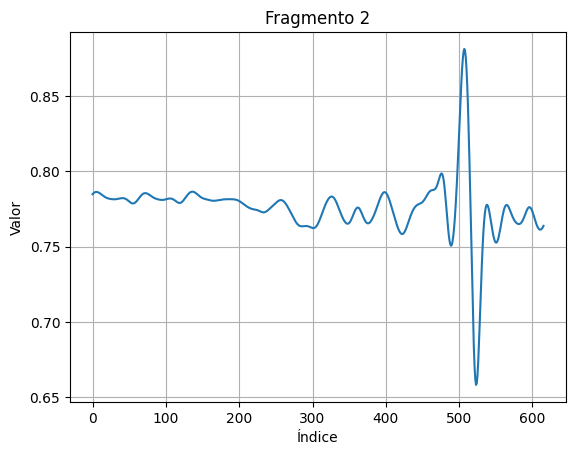

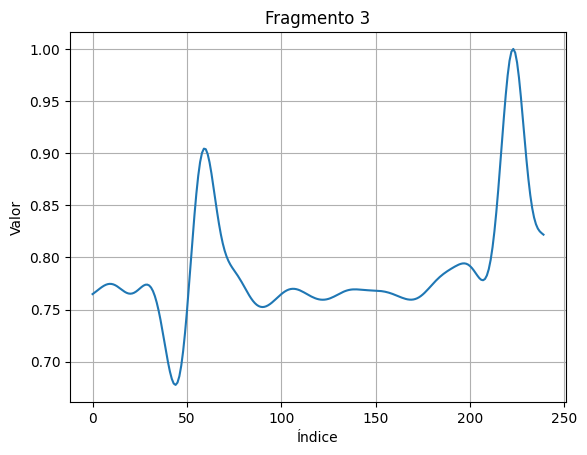

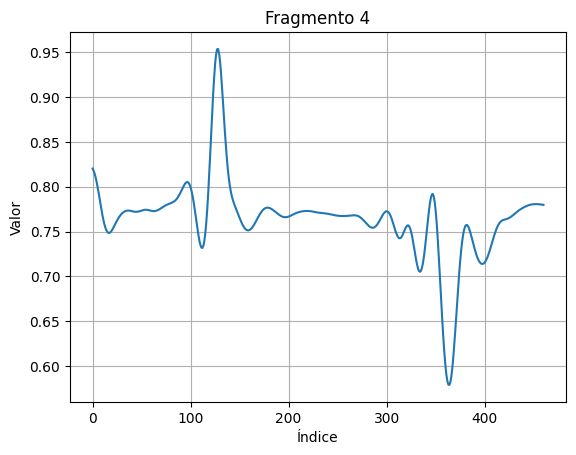

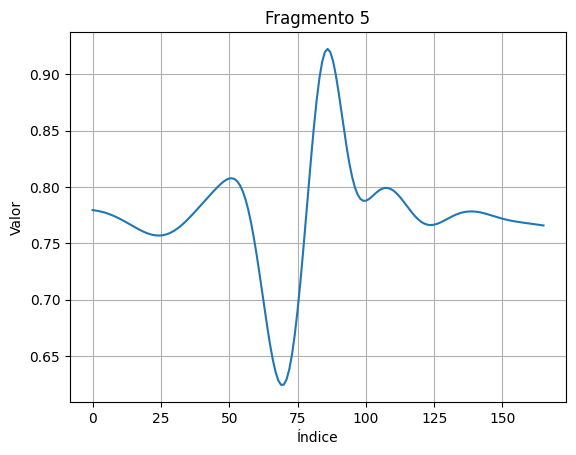

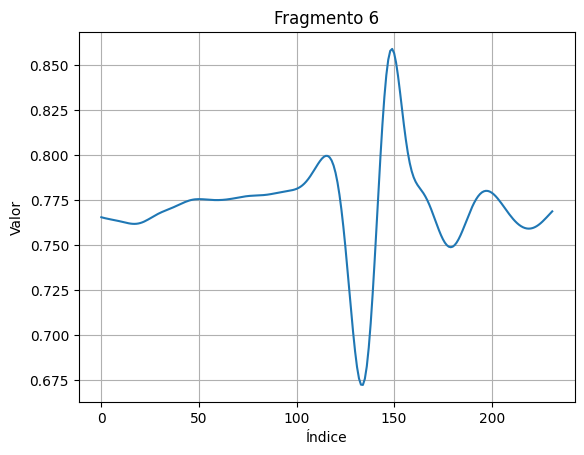

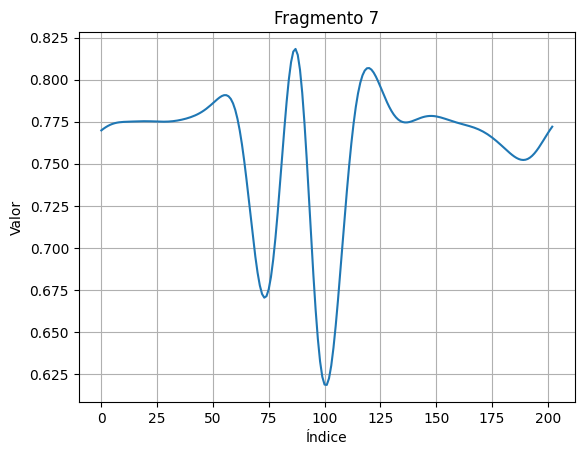

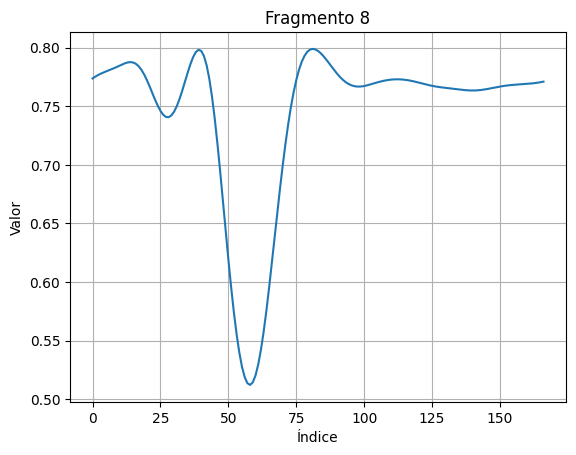

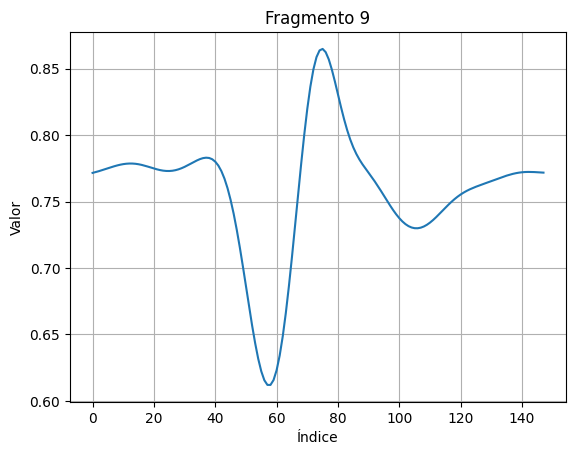

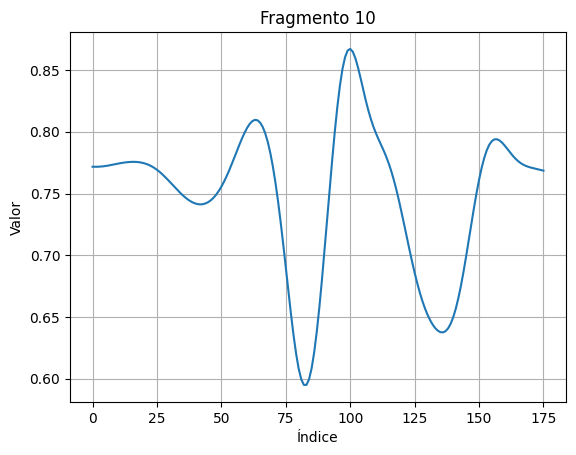

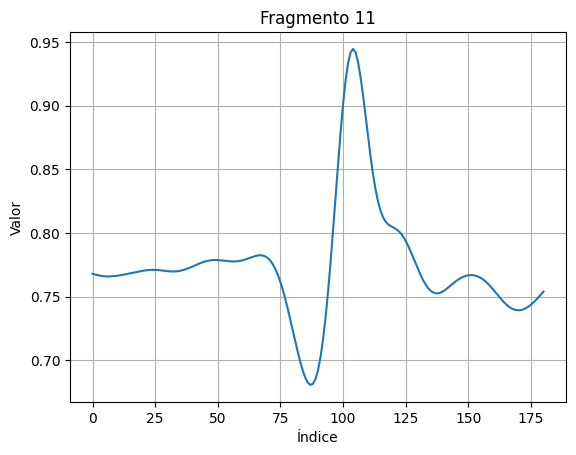

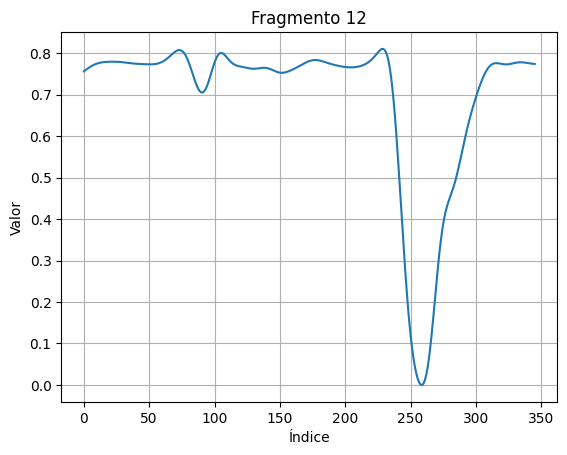

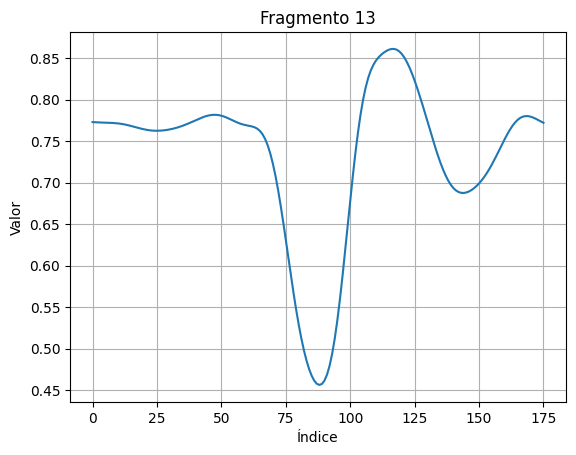

In [66]:
fragments = []

# Fragmentar la señal alrededor de cada pico y plotear cada fragmento
for i, peak_index in enumerate(peaks):
    print 
    if i == 0:
        start_index = peak_index - int(distances_between_peaks[i] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    elif i == len(peaks)-1:
        start_index = peak_index - int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i-1] / 2)
    else:
        start_index = peaks[i-1] + int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    fragment = array_smash[start_index:end_index]
    
    # Obtener la segunda columna de cada fragmento
    fragment_values = fragment['ACC_Z']
    
    # Plotear el fragmento
    plt.figure()
    plt.plot(fragment_values)
    plt.title(f"Fragmento {i+1}")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()
    
    fragments.append(fragment)
    
    


In [67]:

# # Directorio donde se guardarán los archivos CSV
# directory = "C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/fragmentos"

# # Si el directorio no existe, créalo
# if not os.path.exists(directory):
#     os.makedirs(directory)

# # Itera sobre los fragmentos y guárdalos como archivos CSV
# for i, fragment in enumerate(fragments):
#     # Nombre del archivo CSV
#     filename = os.path.join(directory, f"smash_J1_{i+1}.csv")
    
#     # Abre el archivo CSV en modo escritura
#     with open(filename, mode='w', newline='') as file:
#         writer = csv.writer(file)
        
#         # Escribe los datos del fragmento en el archivo CSV
#         for row in fragment:
#             writer.writerow(row)

# VOLEA DERECHA ACC

Media de la señal: 0.5154507393489843
Altura del pico: 0.11091826946759809
Distancia media entre picos: 163.23076923076923
Número total de golpes: 14


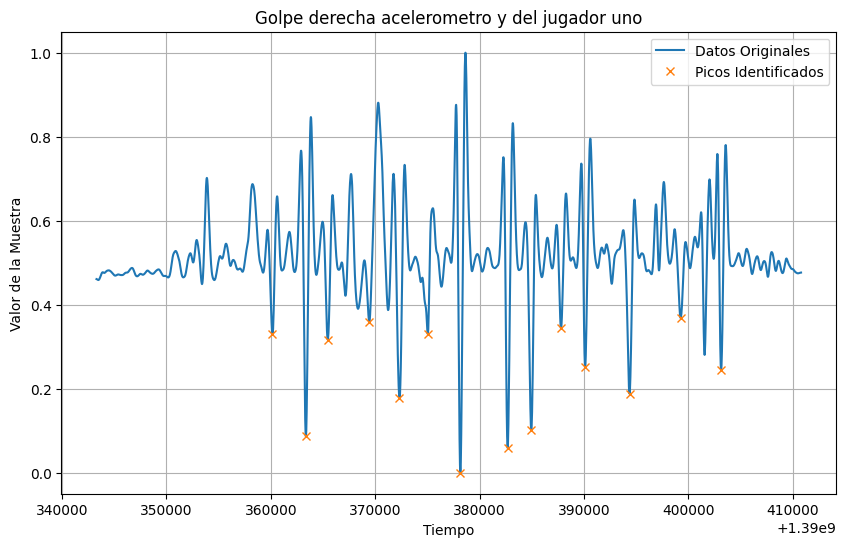

In [68]:
peaks = analyze_signal(array_vd, 'ACC_X')

Media de la señal: 0.3553933992292097
Altura del pico: 0.11831309289032448
Distancia media entre picos: 169.71428571428572
Número total de golpes: 15


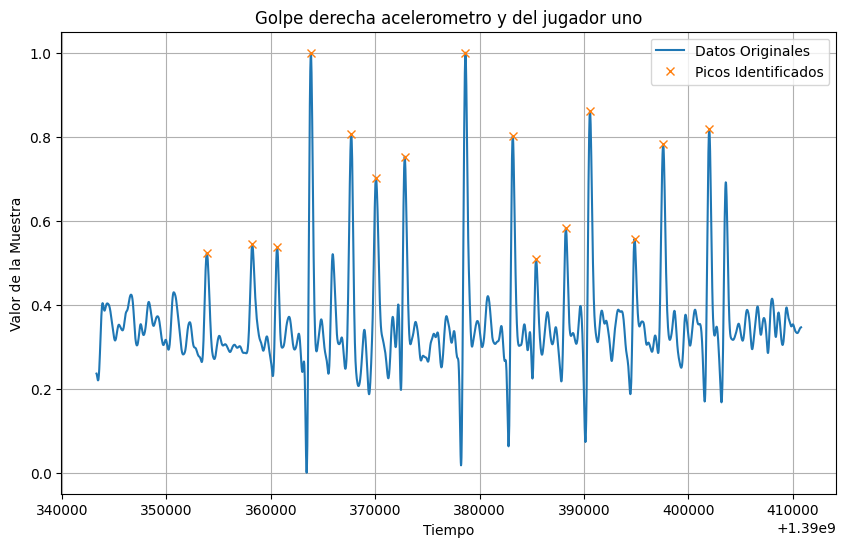

In [69]:
peaks = analyze_signal(array_vd, 'ACC_Y')

Media de la señal: 0.447526739482112
Altura del pico: 0.09232955071202634
Distancia media entre picos: 176.83333333333334
Número total de golpes: 13


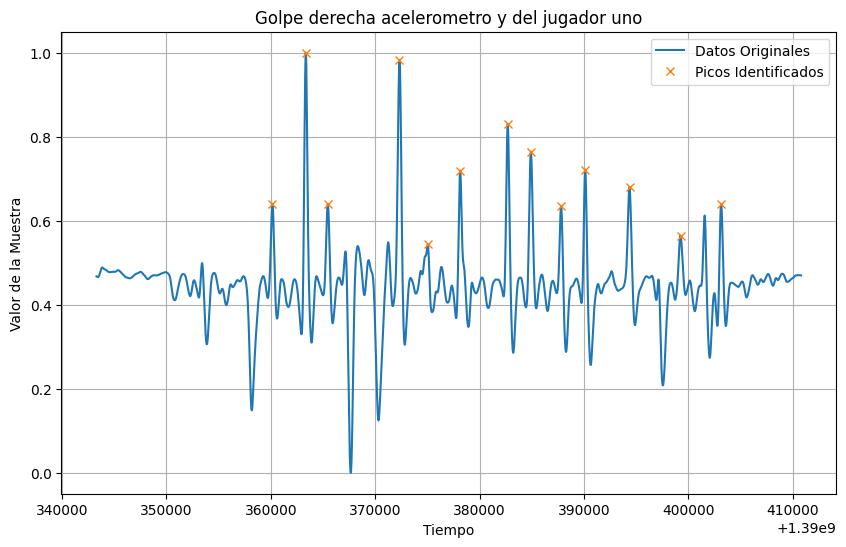

In [70]:
peaks = analyze_signal(array_vd, 'ACC_Z')

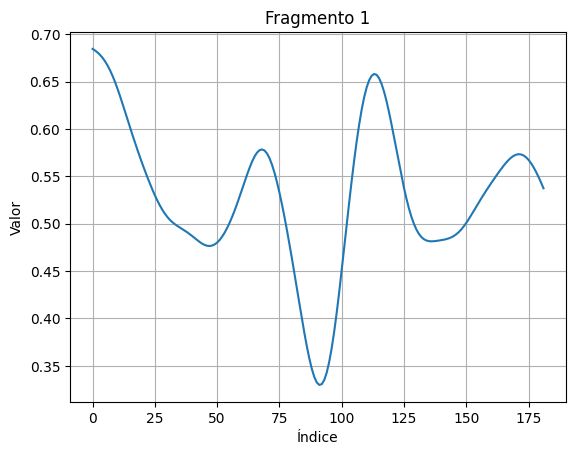

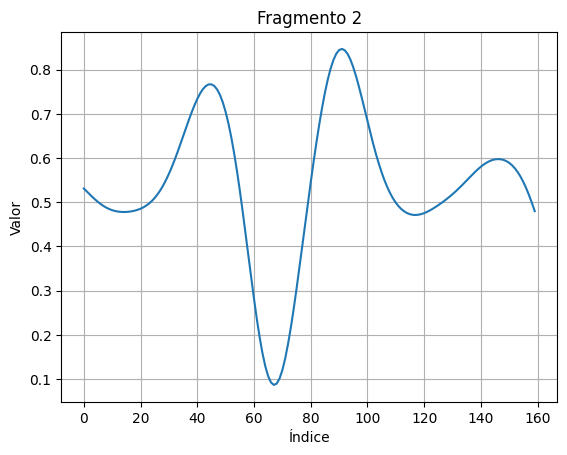

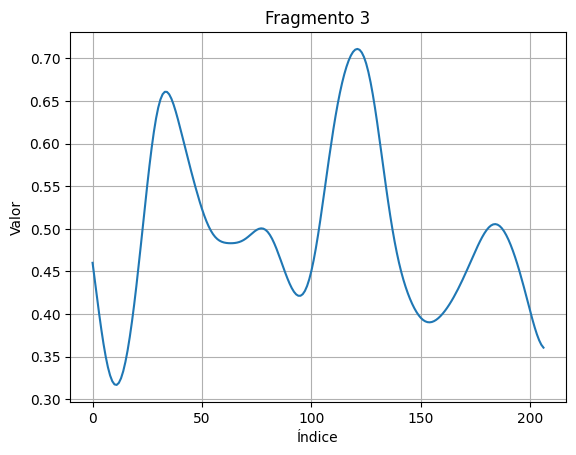

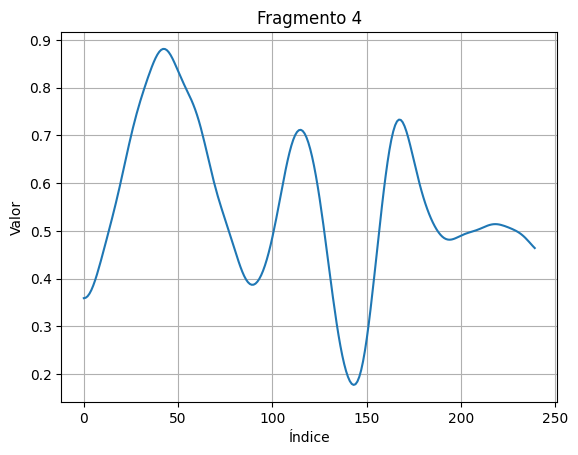

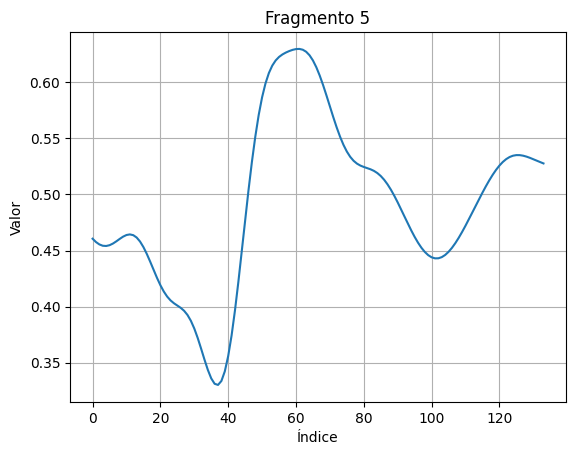

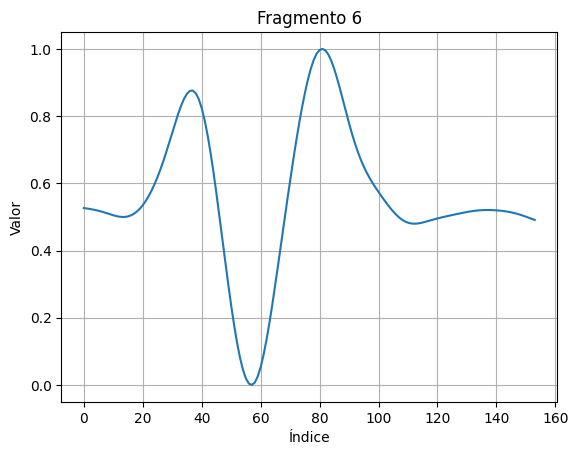

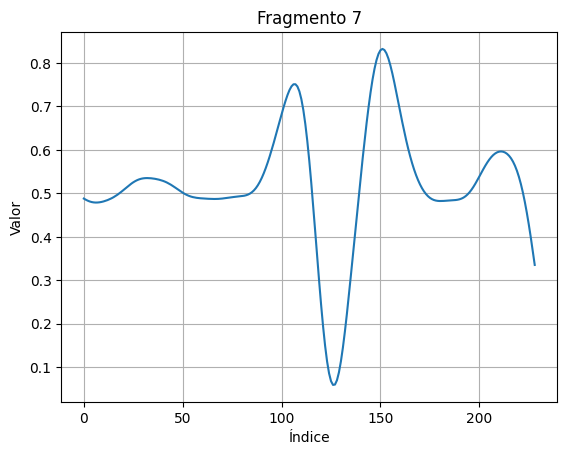

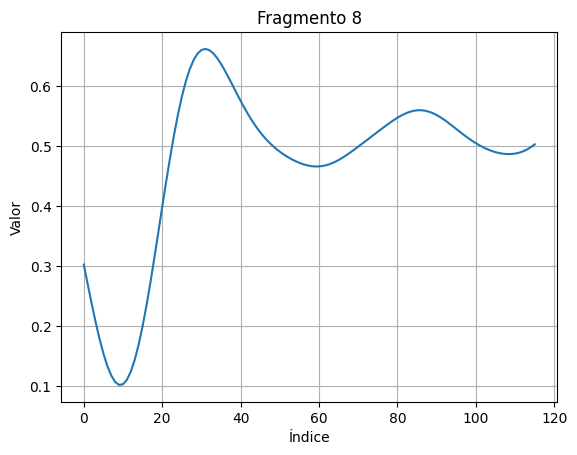

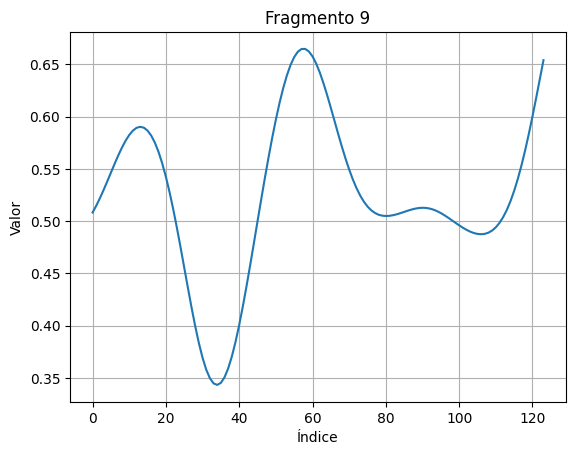

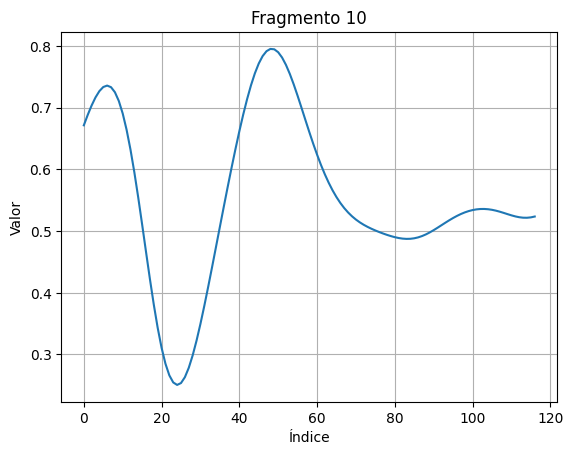

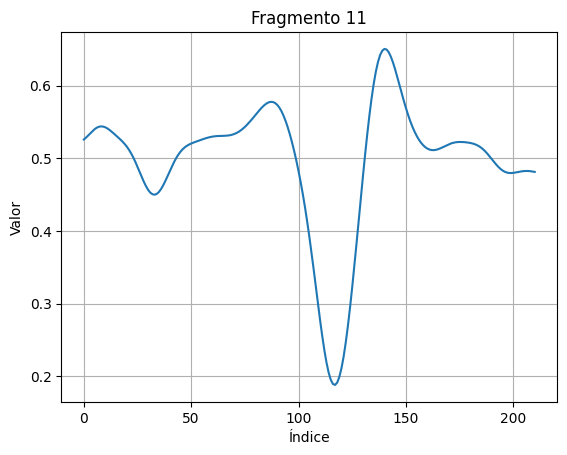

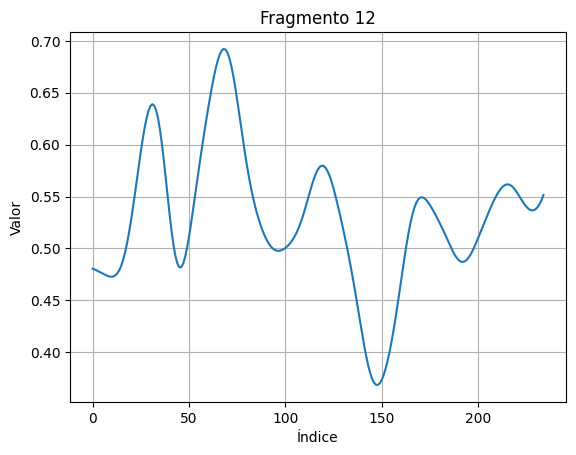

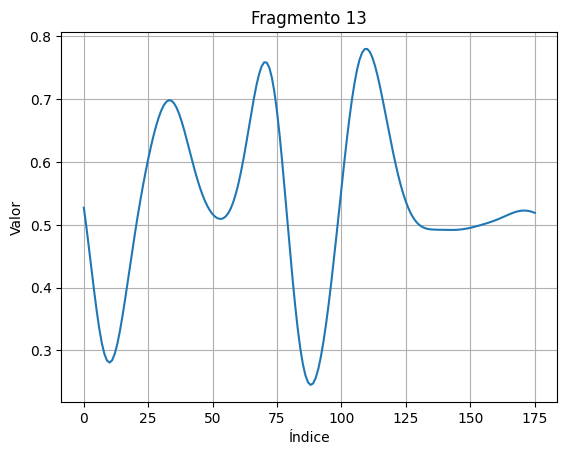

In [71]:
fragments = []

# Fragmentar la señal alrededor de cada pico y plotear cada fragmento
for i, peak_index in enumerate(peaks):
    print 
    if i == 0:
        start_index = peak_index - int(distances_between_peaks[i] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    elif i == len(peaks)-1:
        start_index = peak_index - int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i-1] / 2)
    else:
        start_index = peaks[i-1] + int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    fragment = array_vd[start_index:end_index]
    
    # Obtener la segunda columna de cada fragmento
    fragment_values = fragment['ACC_X']
    
    # Plotear el fragmento
    plt.figure()
    plt.plot(fragment_values)
    plt.title(f"Fragmento {i+1}")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()
    
    fragments.append(fragment)
    

In [72]:

    

# # Directorio donde se guardarán los archivos CSV
# directory = "C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/fragmentos"

# # Si el directorio no existe, créalo
# if not os.path.exists(directory):
#     os.makedirs(directory)

# # Itera sobre los fragmentos y guárdalos como archivos CSV
# for i, fragment in enumerate(fragments):
#     # Nombre del archivo CSV
#     filename = os.path.join(directory, f"vd_J1_{i+1}.csv")
    
#     # Abre el archivo CSV en modo escritura
#     with open(filename, mode='w', newline='') as file:
#         writer = csv.writer(file)
        
#         # Escribe los datos del fragmento en el archivo CSV
#         for row in fragment:
#             writer.writerow(row)

# VOLEA REVES

Media de la señal: 0.5357776951690947
Altura del pico: 0.09263554025877072
Distancia media entre picos: 209.0
Número total de golpes: 11


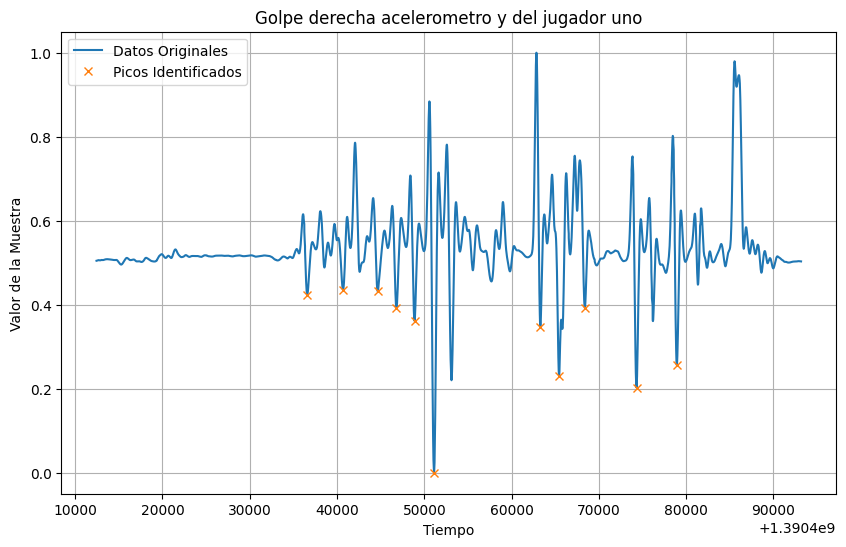

In [73]:
peaks = analyze_signal(array_vr, 'ACC_X')

Media de la señal: 0.20892388105095827
Altura del pico: 0.07561207750148297
Distancia media entre picos: 266.6666666666667
Número total de golpes: 7


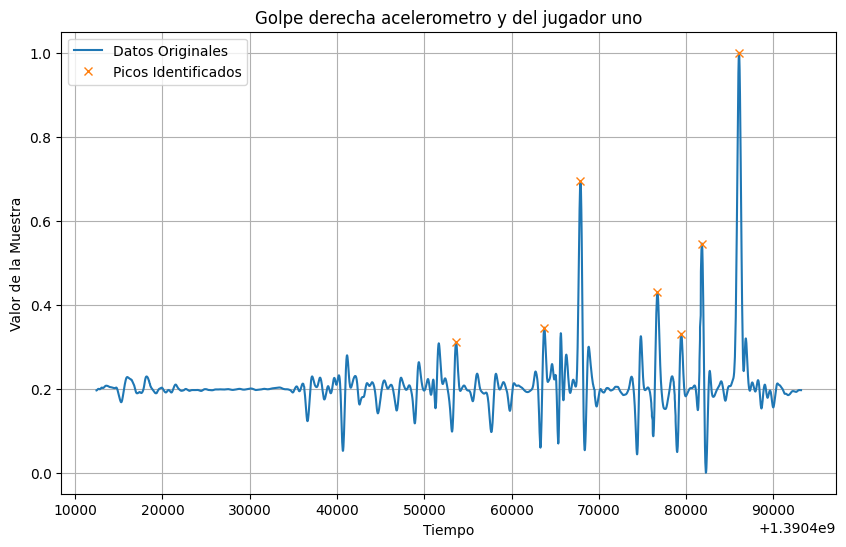

In [74]:
peaks = analyze_signal(array_vr, 'ACC_Y')

Media de la señal: 0.8636066516778275
Altura del pico: 0.08273839912984608
Distancia media entre picos: 310.0
Número total de golpes: 8


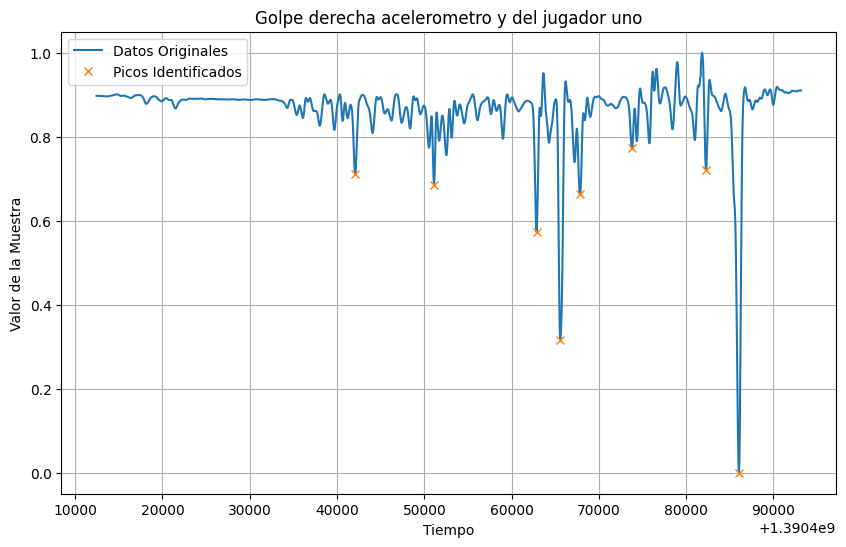

In [75]:
peaks = analyze_signal(array_vr, 'ACC_Z')

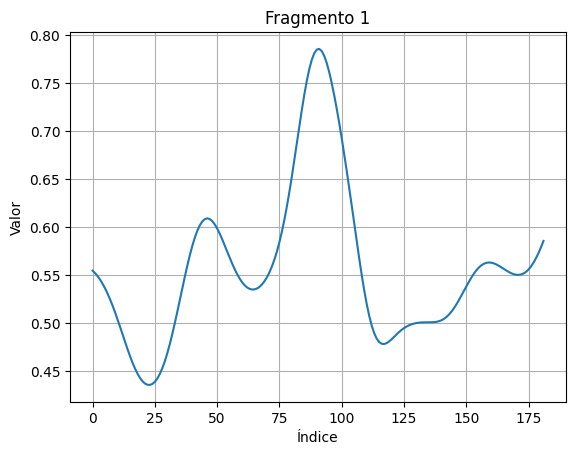

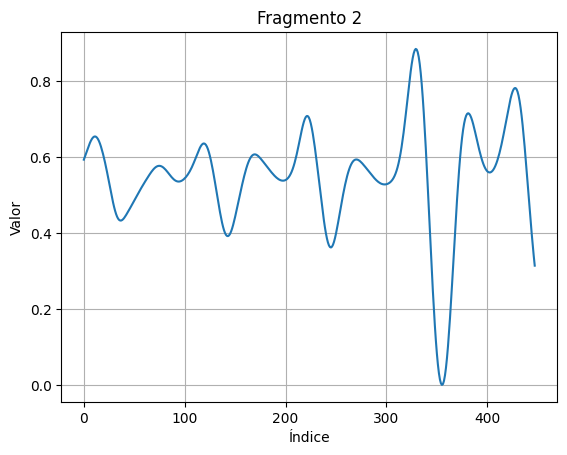

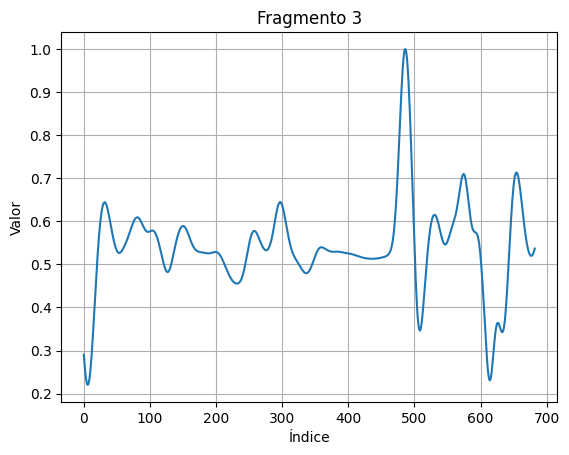

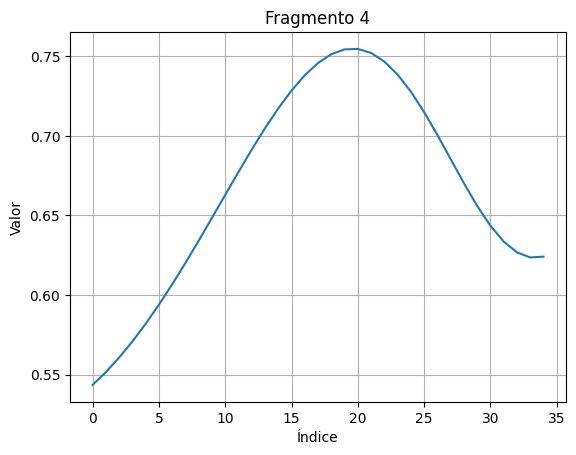

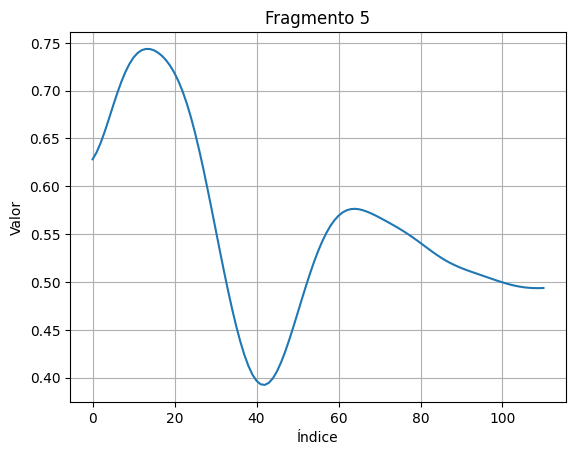

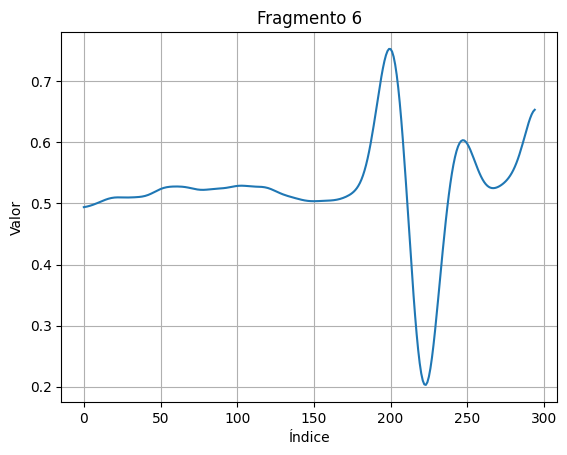

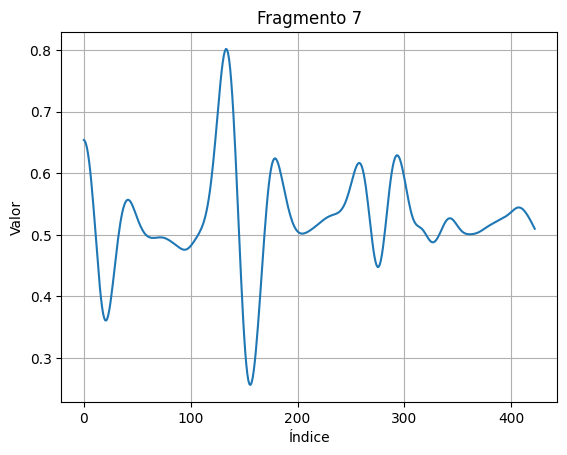

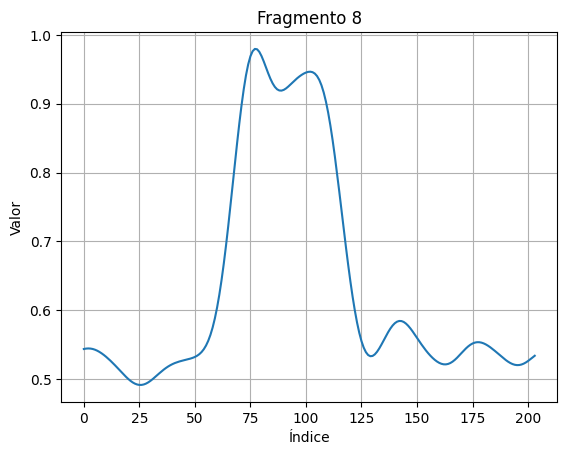

In [76]:
fragments = []

# Fragmentar la señal alrededor de cada pico y plotear cada fragmento
for i, peak_index in enumerate(peaks):
    print 
    if i == 0:
        start_index = peak_index - int(distances_between_peaks[i] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    elif i == len(peaks)-1:
        start_index = peak_index - int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i-1] / 2)
    else:
        start_index = peaks[i-1] + int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    fragment = array_vr[start_index:end_index]
    
    # Obtener la segunda columna de cada fragmento
    fragment_values = fragment['ACC_X']
    
    # Plotear el fragmento
    plt.figure()
    plt.plot(fragment_values)
    plt.title(f"Fragmento {i+1}")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()
    
    fragments.append(fragment)
    
    



In [77]:
# # Directorio donde se guardarán los archivos CSV
# directory = "C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/fragmentos"

# # Si el directorio no existe, créalo
# if not os.path.exists(directory):
#     os.makedirs(directory)

# # Itera sobre los fragmentos y guárdalos como archivos CSV
# for i, fragment in enumerate(fragments):
#     # Nombre del archivo CSV
#     filename = os.path.join(directory, f"vr_J1_{i+1}.csv")
    
#     # Abre el archivo CSV en modo escritura
#     with open(filename, mode='w', newline='') as file:
#         writer = csv.writer(file)
        
#         # Escribe los datos del fragmento en el archivo CSV
#         for row in fragment:
#             writer.writerow(row)